In [1]:
# TODO: Buuilding our classification models

In [3]:


import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import os
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
# from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
import optuna

In [2]:
# # Define your file paths and the correct label for each one
# csv_label_map = {
#     '../stats/male_twenties_features.csv': 0,
#     '../stats/female_twenties_features.csv': 1,
#     '../stats/male_fifties_features.csv': 2,
#     '../stats/female_fifties_features.csv': 3
# }

# # Loop through and update the 'label' column in each CSV
# for file_path, label in csv_label_map.items():
#     df = pd.read_csv(file_path)
#     df['label'] = label  # Overwrite or create 'label' column
#     df.to_csv(file_path, index=False)  # Save it back

# print("Labels updated successfully in all CSVs.")
import pandas as pd

# File path and label mapping
csv_label_map = {
    '../stats/male_twenties_features.csv': 0,
    '../stats/female_twenties_features.csv': 1,
    '../stats/male_fifties_features.csv': 2,
    '../stats/female_fifties_features.csv': 3
}

# Gender and age mapping
csv_gender_map = {
    'male': 0,
    'female': 1
}

csv_age_map = {
    'twenties': 0,
    'fifties': 1
}

# Loop through each file path and corresponding label
for file_path, label in csv_label_map.items():
    # Read the CSV file into a Pandas DataFrame
    df = pd.read_csv(file_path)

    # Determine gender and age from the file path
    gender = csv_gender_map[file_path.split('/')[-1].split('_')[0]]
    age = csv_age_map[file_path.split('/')[-1].split('_')[1].replace('features','')]


    # Add the 'gender' and 'age' columns
    df['gender'] = gender
    df['age'] = age

    # Save the modified DataFrame back to the CSV file
    df.to_csv(file_path, index=False)

print("Gender and age columns added successfully to all CSVs.")

Gender and age columns added successfully to all CSVs.


**_ Data Splitting_**

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split


class_csvs = {
    'class_0': '../stats/male_twenties_features.csv',
    'class_1': '../stats/female_twenties_features.csv',
    'class_2': '../stats/male_fifties_features.csv',
    'class_3': '../stats/female_fifties_features.csv'
}

# Containers for splits
train_list = []
val_list = []
test_list = []

for class_label, path in class_csvs.items():
    # Read CSV and assign label
    df = pd.read_csv(path)
    df['label'] = int(class_label.split('_')[1])  # Assign numerical label: 0,1,2,3
    
    # Step 1: Train (60%) vs Temp (40%)
    df_train, df_temp = train_test_split(df, test_size=0.4, random_state=42, shuffle=True)
    
    # Step 2: Split Temp into Val (20%) and Test (20%)
    df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42, shuffle=True)
    
    # Collect splits
    train_list.append(df_train)
    val_list.append(df_val)
    test_list.append(df_test)

# Combine each split across all classes
train_data = pd.concat(train_list).sample(frac=1, random_state=42).reset_index(drop=True)
val_data   = pd.concat(val_list).sample(frac=1, random_state=42).reset_index(drop=True)
test_data  = pd.concat(test_list).sample(frac=1, random_state=42).reset_index(drop=True)

# Optional: Save to CSV
train_data.to_csv('../stats/train_data.csv', index=False)
val_data.to_csv('../stats/val_data.csv', index=False)
test_data.to_csv('../stats/test_data.csv', index=False)

print("Balanced train/val/test datasets created.")


Balanced train/val/test datasets created.


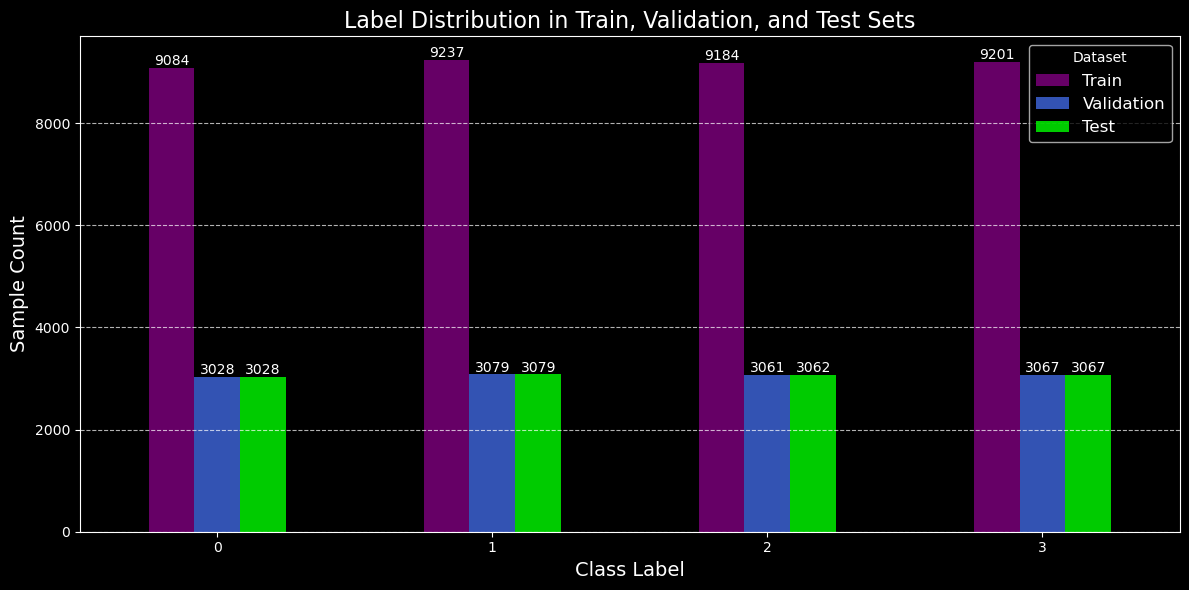

In [5]:

# Step 1: Load your split CSVs
train_df = pd.read_csv('../stats/train_data.csv')
val_df = pd.read_csv('../stats/val_data.csv')
test_df = pd.read_csv('../stats/test_data.csv')

# Step 2: Count label occurrences
train_counts = train_df['label'].value_counts().sort_index()
val_counts = val_df['label'].value_counts().sort_index()
test_counts = test_df['label'].value_counts().sort_index()

# Step 3: Build a DataFrame for plotting
label_distribution = pd.DataFrame({
    'Train': train_counts,
    'Validation': val_counts,
    'Test': test_counts
})

# Step 4: Plot
colors = ['#800080', '#4169e1', '#00ff00']
ax = label_distribution.plot(kind='bar', figsize=(12, 6), alpha=0.8, color=colors)

# Add annotations
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', xytext=(0, 5),
        textcoords='offset points', fontsize=10, color='white'
    )

# Format the plot
plt.title('Label Distribution in Train, Validation, and Test Sets', fontsize=16)
plt.xlabel('Class Label', fontsize=14)
plt.ylabel('Sample Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Dataset', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd

# Step 1: Read the split datasets
train_df = pd.read_csv('../stats/train_data.csv')
val_df = pd.read_csv('../stats/val_data.csv')
test_df = pd.read_csv('../stats/test_data.csv')

# # Step 2: Summaries

# # --- Train ---
# print("🔹 TRAIN SET")
# print("\n[INFO]")
# train_df.info()
# print("\n[DESCRIBE]")
# print(train_df.describe())
# print("\n[HEAD]")
# print(train_df.head(3))
# print("\n" + "="*80)

# # --- Validation ---
# print("🔹 VALIDATION SET")
# print("\n[INFO]")
# val_df.info()
# print("\n[DESCRIBE]")
# print(val_df.describe())
# print("\n[HEAD]")
# print(val_df.head(3))
# print("\n" + "="*80)

# # --- Test ---
# print("🔹 TEST SET")
# print("\n[INFO]")
# test_df.info()
# print("\n[DESCRIBE]")
# print(test_df.describe())
# print("\n[HEAD]")
# print(test_df.head(3))


training_data_known

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36706 entries, 0 to 36705
Columns: 206 entries, zcr to spectral_contrast_156
dtypes: float64(203), int64(3)
memory usage: 57.7 MB


In [8]:
train_df.describe()

,zcr,rms,amplitude_envelope,spectral_centroid,spectral_bandwidth,band_energy_ratio,spectral_rolloff,spectral_flatness,spectral_contrast_0,spectral_contrast_1,...,spectral_contrast_147,spectral_contrast_148,spectral_contrast_149,spectral_contrast_150,spectral_contrast_151,spectral_contrast_152,spectral_contrast_153,spectral_contrast_154,spectral_contrast_155,spectral_contrast_156
count,36706.000000,36706.000000,36706.000000,36706.000000,36706.000000,3.670600e+04,36706.000000,36706.000000,36706.000000,36706.000000,...,9201.000000,9201.000000,9201.000000,9201.000000,9201.000000,9201.000000,9201.000000,9201.000000,9201.000000,9201.000000
mean,0.184297,0.091545,0.367998,1920.405979,1198.760325,1.342736e+05,3046.919853,0.005274,15.429968,19.620521,...,3.828680,3.713612,3.589499,3.463217,3.332701,3.209985,3.099478,2.952896,1.938715,1.391458
std,0.050088,0.026227,0.090116,436.569762,168.676843,1.020686e+06,592.846467,0.004763,3.013041,3.577837,...,9.587362,9.465420,9.335140,9.204491,9.057870,8.892638,8.768551,8.593184,5.837213,4.328073
min,0.041550,0.027156,0.099458,644.461541,520.908536,5.158320e-02,1045.058140,0.000030,3.490995,3.824907,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.149406,0.073223,0.303549,1619.010909,1089.106652,1.292539e+02,2658.610268,0.002472,13.783486,17.093485,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.181355,0.087791,0.360210,1900.711189,1195.539406,8.980410e+02,3044.124170,0.004083,14.992530,19.453669,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.216428,0.105703,0.424258,2201.263781,1304.988388,1.014806e+04,3436.597451,0.006588,16.915777,21.896700,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.454877,0.286915,0.788383,4456.063580,2239.153236,4.630014e+07,5979.225852,0.101200,31.591613,35.645249,...,39.669821,40.497293,38.570653,40.739067,39.957533,40.461792,38.613929,39.290464,32.050761,25.890098


In [9]:
train_df.head(3)

,zcr,rms,amplitude_envelope,spectral_centroid,spectral_bandwidth,band_energy_ratio,spectral_rolloff,spectral_flatness,spectral_contrast_0,spectral_contrast_1,...,spectral_contrast_147,spectral_contrast_148,spectral_contrast_149,spectral_contrast_150,spectral_contrast_151,spectral_contrast_152,spectral_contrast_153,spectral_contrast_154,spectral_contrast_155,spectral_contrast_156
0,0.183597,0.096665,0.367145,1798.609098,908.036115,2674.953802,2631.966561,0.001519,12.594031,20.691771,...,17.118129,22.895722,25.410904,26.432145,30.970481,29.125946,29.041596,29.758236,17.701913,12.944713
1,0.243579,0.093006,0.414861,2250.702428,1277.151624,77.777994,3406.839623,0.011374,15.894424,18.572166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.150337,0.105686,0.410631,1667.829357,1232.945674,211604.129799,2683.664773,0.002701,13.797315,15.811187,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
train_df.columns

Index(['zcr', 'rms', 'amplitude_envelope', 'spectral_centroid',
       'spectral_bandwidth', 'band_energy_ratio', 'spectral_rolloff',
       'spectral_flatness', 'spectral_contrast_0', 'spectral_contrast_1',
       ...
       'spectral_contrast_147', 'spectral_contrast_148',
       'spectral_contrast_149', 'spectral_contrast_150',
       'spectral_contrast_151', 'spectral_contrast_152',
       'spectral_contrast_153', 'spectral_contrast_154',
       'spectral_contrast_155', 'spectral_contrast_156'],
      dtype='object', length=206)

In [11]:
train_df.isnull().sum()

zcr                          0
rms                          0
amplitude_envelope           0
spectral_centroid            0
spectral_bandwidth           0
                         ...  
spectral_contrast_152    27505
spectral_contrast_153    27505
spectral_contrast_154    27505
spectral_contrast_155    27505
spectral_contrast_156    27505
Length: 206, dtype: int64

In [12]:
train_df =train_df.dropna(axis=1, how='any')
train_df.isnull().sum()

zcr                   0
rms                   0
amplitude_envelope    0
spectral_centroid     0
spectral_bandwidth    0
                     ..
beat_interval         0
onset_interval        0
label                 0
gender                0
age                   0
Length: 129, dtype: int64

In [13]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12235 entries, 0 to 12234
Columns: 206 entries, zcr to spectral_contrast_156
dtypes: float64(203), int64(3)
memory usage: 19.2 MB


In [14]:
val_df.describe()

,zcr,rms,amplitude_envelope,spectral_centroid,spectral_bandwidth,band_energy_ratio,spectral_rolloff,spectral_flatness,spectral_contrast_0,spectral_contrast_1,...,spectral_contrast_147,spectral_contrast_148,spectral_contrast_149,spectral_contrast_150,spectral_contrast_151,spectral_contrast_152,spectral_contrast_153,spectral_contrast_154,spectral_contrast_155,spectral_contrast_156
count,12235.000000,12235.000000,12235.000000,12235.000000,12235.000000,1.223500e+04,12235.000000,12235.000000,12235.000000,12235.000000,...,3067.000000,3067.000000,3067.000000,3067.000000,3067.000000,3067.000000,3067.000000,3067.000000,3067.000000,3067.000000
mean,0.184316,0.091959,0.369103,1923.139417,1200.843470,1.301123e+05,3053.360876,0.005265,15.428428,19.683426,...,3.716152,3.614686,3.505164,3.321351,3.206773,3.090714,2.995905,2.853675,1.885609,1.354396
std,0.050394,0.026853,0.091538,439.298923,169.654634,1.174698e+06,595.818985,0.004684,3.037912,3.593071,...,9.558872,9.429102,9.305180,9.026330,8.941012,8.831449,8.698237,8.506497,5.824506,4.342804
min,0.035254,0.027546,0.101163,603.964146,558.715329,4.676738e-01,897.591561,0.000053,4.002382,4.090100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.149497,0.073036,0.303329,1622.664575,1089.413705,1.244032e+02,2658.626057,0.002426,13.788454,17.158238,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.181732,0.088213,0.360484,1907.711276,1197.896079,8.866899e+02,3052.256944,0.004086,15.036663,19.522553,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.216540,0.106674,0.427037,2209.616048,1306.754025,9.259240e+03,3452.308880,0.006589,16.913093,21.975700,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.518164,0.271070,0.791780,4962.192960,1999.538685,8.293970e+07,6272.596154,0.106361,31.785436,36.583934,...,38.798120,40.724688,38.352168,36.580335,38.803413,39.252221,40.207439,39.494006,31.466943,27.406371


In [15]:
val_df.head(3)

,zcr,rms,amplitude_envelope,spectral_centroid,spectral_bandwidth,band_energy_ratio,spectral_rolloff,spectral_flatness,spectral_contrast_0,spectral_contrast_1,...,spectral_contrast_147,spectral_contrast_148,spectral_contrast_149,spectral_contrast_150,spectral_contrast_151,spectral_contrast_152,spectral_contrast_153,spectral_contrast_154,spectral_contrast_155,spectral_contrast_156
0,0.221552,0.082847,0.375046,2146.166880,1307.653687,650.678297,3393.511146,0.002911,15.529499,21.703881,...,33.865052,34.812241,34.778929,32.143726,29.539816,25.088255,26.179808,27.008773,26.576178,23.372418
1,0.146927,0.101988,0.332857,1764.471221,1417.916259,601.257974,3204.345703,0.008503,18.965983,20.408957,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.163533,0.140735,0.488556,1851.070422,1136.042243,468.794313,2925.698138,0.004186,12.510208,21.186194,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
val_df.isnull().sum()

zcr                         0
rms                         0
amplitude_envelope          0
spectral_centroid           0
spectral_bandwidth          0
                         ... 
spectral_contrast_152    9168
spectral_contrast_153    9168
spectral_contrast_154    9168
spectral_contrast_155    9168
spectral_contrast_156    9168
Length: 206, dtype: int64

In [17]:
val_df = val_df.dropna(axis=1, how='any')
val_df.isnull().sum()

zcr                   0
rms                   0
amplitude_envelope    0
spectral_centroid     0
spectral_bandwidth    0
                     ..
beat_interval         0
onset_interval        0
label                 0
gender                0
age                   0
Length: 129, dtype: int64

In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12236 entries, 0 to 12235
Columns: 206 entries, zcr to spectral_contrast_156
dtypes: float64(203), int64(3)
memory usage: 19.2 MB


In [19]:
test_df.describe()

,zcr,rms,amplitude_envelope,spectral_centroid,spectral_bandwidth,band_energy_ratio,spectral_rolloff,spectral_flatness,spectral_contrast_0,spectral_contrast_1,...,spectral_contrast_147,spectral_contrast_148,spectral_contrast_149,spectral_contrast_150,spectral_contrast_151,spectral_contrast_152,spectral_contrast_153,spectral_contrast_154,spectral_contrast_155,spectral_contrast_156
count,12236.000000,12236.000000,12236.000000,12236.000000,12236.000000,1.223600e+04,12236.000000,12236.000000,12236.000000,12236.000000,...,3067.000000,3067.000000,3067.000000,3067.000000,3067.000000,3067.000000,3067.000000,3067.000000,3067.000000,3067.000000
mean,0.184277,0.091786,0.368280,1918.460379,1196.506242,1.261911e+05,3042.694910,0.005231,15.418017,19.609892,...,3.843926,3.698136,3.532182,3.410649,3.250686,3.112181,2.979049,2.877533,1.846412,1.318354
std,0.050509,0.026455,0.089946,441.707906,170.599054,1.010440e+06,600.865660,0.004783,2.996969,3.518980,...,9.662056,9.528101,9.300679,9.125168,8.922236,8.734978,8.581053,8.478252,5.659128,4.195310
min,0.040948,0.028899,0.115365,623.333389,531.289161,1.826604e-01,824.501812,0.000076,3.588087,4.584591,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.149838,0.073444,0.302710,1615.449062,1083.732632,1.267759e+02,2648.604911,0.002407,13.778978,17.212448,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.181268,0.087998,0.360978,1897.860977,1193.360903,9.059171e+02,3037.635254,0.004052,15.015828,19.437347,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.216700,0.106122,0.424420,2203.231742,1304.719950,9.604987e+03,3442.947287,0.006566,16.879269,21.802536,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.470536,0.264841,0.772589,4229.697778,2008.909609,3.961080e+07,6014.867071,0.118869,29.562661,36.395444,...,38.057566,42.091626,38.855911,38.152088,37.212147,38.273968,39.193849,40.183419,30.605775,23.570315


In [20]:
test_df.head(3)

,zcr,rms,amplitude_envelope,spectral_centroid,spectral_bandwidth,band_energy_ratio,spectral_rolloff,spectral_flatness,spectral_contrast_0,spectral_contrast_1,...,spectral_contrast_147,spectral_contrast_148,spectral_contrast_149,spectral_contrast_150,spectral_contrast_151,spectral_contrast_152,spectral_contrast_153,spectral_contrast_154,spectral_contrast_155,spectral_contrast_156
0,0.151816,0.067469,0.247635,1676.012269,1137.336698,278.956347,2803.869913,0.002318,16.041675,21.842805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.208929,0.144644,0.602240,2034.437081,1072.535519,31.877970,3077.368952,0.001873,15.155917,16.511271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.126919,0.102408,0.398155,1607.153638,1496.654585,133326.262827,2903.960129,0.003247,13.938662,17.986486,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
test_df = test_df.dropna(axis=1, how='any')
test_df.isnull().sum()

zcr                   0
rms                   0
amplitude_envelope    0
spectral_centroid     0
spectral_bandwidth    0
                     ..
beat_interval         0
onset_interval        0
label                 0
gender                0
age                   0
Length: 129, dtype: int64

**_Scalling the data_**

In [22]:
def scale_features(X_train, X_val, X_test):
    scaler = StandardScaler()
    
    # Fit the scaler on the training data and transform
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    # Convert to DataFrame and preserve column names
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled_df, X_val_scaled_df, X_test_scaled_df

In [23]:
train_df.columns

Index(['zcr', 'rms', 'amplitude_envelope', 'spectral_centroid',
       'spectral_bandwidth', 'band_energy_ratio', 'spectral_rolloff',
       'spectral_flatness', 'spectral_contrast_0', 'spectral_contrast_1',
       ...
       'tonnetz_4', 'tonnetz_5', 'cqt', 'pitch', 'tempo', 'beat_interval',
       'onset_interval', 'label', 'gender', 'age'],
      dtype='object', length=129)

In [24]:
# # Step 1: Separate features and labels
# X_train = train_df.drop('label', axis=1)
# y_train = train_df['label']

# X_val = val_df.drop('label', axis=1)
# y_val = val_df['label']

# X_test = test_df.drop('label', axis=1)
# y_test = test_df['label']

# # Step 2: Print shapes
# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)

# print("X_val shape:", X_val.shape)
# print("y_val shape:", y_val.shape)

# print("X_test shape:", X_test.shape)
# print("y_test shape:", y_test.shape)

# # Step 3: Define scaling function
# def scale_features(X_train, X_val, X_test):
#     from sklearn.preprocessing import StandardScaler
#     scaler = StandardScaler()

#     X_train_scaled = scaler.fit_transform(X_train)
#     X_val_scaled = scaler.transform(X_val)
#     X_test_scaled = scaler.transform(X_test)

#     X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
#     X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns)
#     X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#     return X_train_scaled_df, X_val_scaled_df, X_test_scaled_df

# # Step 4: Apply scaling
# X_train_scaled, X_val_scaled, X_test_scaled = scale_features(X_train, X_val, X_test)


In [25]:
# X_train = train_df.drop('label', axis=1)
# y_train = train_df['label']

# X_val = val_df.drop('label', axis=1)
# y_val = val_df['label']

# X_test = test_df.drop('label', axis=1)
# y_test = test_df['label']

# # Step 2: Print shapes
# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)

# print("X_val shape:", X_val.shape)
# print("y_val shape:", y_val.shape)

# print("X_test shape:", X_test.shape)
# print("y_test shape:", y_test.shape)

# # Step 3: Define the selected features to keep
# selected_features = [
#     'pitch',
#     'chroma_0', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5',
#     'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11',
#     'mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6',
#     'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12',
#     'age'
# ]

# # Step 4: Filter datasets to keep only selected features
# X_train_filtered = X_train[selected_features]
# X_val_filtered = X_val[selected_features]
# X_test_filtered = X_test[selected_features]

# # Step 5: Scaling function
# scaler = StandardScaler()
# def scale_features(X_train, X_val, X_test):
    
    
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_val_scaled = scaler.transform(X_val)
#     X_test_scaled = scaler.transform(X_test)
    
#     X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
#     X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns)
#     X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
#     return X_train_scaled_df, X_val_scaled_df, X_test_scaled_df

# # Step 6: Apply scaling
# X_train_scaled, X_val_scaled, X_test_scaled = scale_features(
#     X_train_filtered, X_val_filtered, X_test_filtered
# )

# # Final confirmation print
# print("Filtered and scaled shapes:")
# print("X_train_scaled:", X_train_scaled.shape)
# print("X_val_scaled:", X_val_scaled.shape)
# print("X_test_scaled:", X_test_scaled.shape)


# Step 1: Split features and labels
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Split data into X and y
X_train = train_df.drop('label', axis=1)
y_train = train_df['label']
y_train_age=    train_df['age']
y_train_gender=    train_df['gender']

X_val = val_df.drop('label', axis=1)
y_val = val_df['label']
y_val_age=    val_df['age']
y_val_gender=    val_df['gender']



X_test = test_df.drop('label', axis=1)
y_test = test_df['label']
y_test_age=    test_df['age']
y_test_gender=    test_df['gender']

common_features = [
    'pitch',
    'chroma_0', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5',
    'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11',
    'mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6',
    'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12','zcr'
]

# Step 2: Scale everything first
scaler = StandardScaler()
X_train_scaled_all = pd.DataFrame(scaler.fit_transform(X_train[common_features]), columns=common_features)
X_val_scaled_all = pd.DataFrame(scaler.transform(X_val[common_features]), columns=common_features)
X_test_scaled_all = pd.DataFrame(scaler.transform(X_test[common_features]), columns=common_features)

# # Step 3: Define common features
# common_features = [
#     'pitch',
#     'chroma_0', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5',
#     'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11',
#     'mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6',
#     'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12'
# ]

# # Step 4: Define three feature sets
# features_gender = common_features + ['gender']
# features_age = common_features + ['age']
# features_both = common_features + ['gender', 'age']

# # Step 5: Prepare the 3 scaled versions
# X_train_gender = X_train_scaled_all[features_gender]
# X_val_gender = X_val_scaled_all[features_gender]
# X_test_gender = X_test_scaled_all[features_gender]

# X_train_age = X_train_scaled_all[features_age]
# X_val_age = X_val_scaled_all[features_age]
# X_test_age = X_test_scaled_all[features_age]

# X_train_both = X_train_scaled_all[features_both]
# X_val_both = X_val_scaled_all[features_both]
# X_test_both = X_test_scaled_all[features_both]

# Optional: Confirm dimensions
print("With Gender:", X_train_scaled_all.shape)
print("With Age:", X_val_scaled_all.shape)
print("With Both:", X_test_scaled_all.shape)


With Gender: (36706, 27)
With Age: (12235, 27)
With Both: (12236, 27)


In [26]:
X_train_scaled_all.describe()

,pitch,chroma_0,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,...,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,zcr
count,3.670600e+04,3.670600e+04,3.670600e+04,3.670600e+04,3.670600e+04,3.670600e+04,3.670600e+04,3.670600e+04,3.670600e+04,3.670600e+04,...,3.670600e+04,3.670600e+04,3.670600e+04,3.670600e+04,3.670600e+04,3.670600e+04,3.670600e+04,3.670600e+04,3.670600e+04,3.670600e+04
mean,4.227716e-16,1.763484e-16,-7.220412e-17,1.645402e-16,1.991905e-16,-5.582753e-16,4.715529e-16,2.818477e-16,-3.782489e-16,-7.481741e-17,...,-3.503739e-17,-1.749934e-16,1.660888e-16,-5.071710e-17,-2.539727e-16,-2.357765e-16,-1.401496e-16,1.397624e-16,-1.072415e-16,-6.008622e-16
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,...,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-3.779224e+00,-3.058242e+00,-2.865998e+00,-2.951875e+00,-2.980553e+00,-3.101080e+00,-3.079057e+00,-3.136722e+00,-3.251622e+00,-3.416042e+00,...,-3.952249e+00,-4.460483e+00,-3.943595e+00,-4.540480e+00,-5.029751e+00,-5.206328e+00,-4.945900e+00,-4.105165e+00,-4.521783e+00,-2.849950e+00
25%,-6.519783e-01,-7.015887e-01,-7.119672e-01,-7.239047e-01,-7.207782e-01,-7.069104e-01,-7.023786e-01,-6.943102e-01,-6.812813e-01,-6.869365e-01,...,-6.556046e-01,-6.464666e-01,-6.655712e-01,-6.554399e-01,-6.347029e-01,-6.528198e-01,-6.399385e-01,-6.376572e-01,-6.329784e-01,-6.966078e-01
50%,4.645292e-02,-6.029702e-02,-6.223807e-02,-5.938542e-02,-4.695382e-02,-4.033752e-02,-3.458877e-02,-2.423745e-02,-3.534397e-02,-3.946920e-02,...,-3.063729e-03,3.156573e-02,-5.148515e-03,-9.839967e-03,5.517849e-03,-1.875180e-02,-6.740370e-04,-1.375000e-02,1.105125e-02,-5.874853e-02
75%,6.968077e-01,6.265938e-01,6.401183e-01,6.564864e-01,6.712099e-01,6.597291e-01,6.526420e-01,6.498234e-01,6.476341e-01,6.446240e-01,...,6.688518e-01,6.704943e-01,6.690770e-01,6.466953e-01,6.330882e-01,6.529084e-01,6.345081e-01,6.125597e-01,6.383367e-01,6.414837e-01
max,4.710280e+00,5.957069e+00,6.195362e+00,4.828364e+00,5.709521e+00,4.713334e+00,5.193182e+00,5.854896e+00,4.858380e+00,4.693744e+00,...,4.044465e+00,3.701428e+00,4.628536e+00,4.995767e+00,6.095177e+00,4.585228e+00,4.864021e+00,5.653913e+00,5.586992e+00,5.402136e+00


In [27]:
X_val_scaled_all.describe()

,pitch,chroma_0,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,...,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,zcr
count,12235.000000,12235.000000,12235.000000,12235.000000,12235.000000,12235.000000,12235.000000,12235.000000,12235.000000,12235.000000,...,12235.000000,12235.000000,12235.000000,12235.000000,12235.000000,12235.000000,12235.000000,12235.000000,12235.000000,12235.000000
mean,0.007257,0.015529,0.008186,-0.004146,-0.009717,-0.009283,0.001505,0.015160,0.013960,0.015233,...,-0.004535,0.002413,0.001018,-0.019498,-0.012148,-0.014337,-0.010568,-0.003403,-0.009201,0.000374
std,1.007591,1.008415,1.005102,0.997931,1.003982,0.996532,1.002200,1.004827,1.003305,1.002585,...,1.001696,1.011862,1.012138,1.007589,1.016457,0.991943,0.987389,1.012058,1.005590,1.006121
min,-3.439171,-2.945166,-2.821068,-2.801675,-2.919511,-3.009281,-2.886490,-2.958963,-3.070563,-3.388127,...,-3.911445,-4.240883,-4.380993,-5.043008,-4.818657,-4.650208,-3.881563,-4.386908,-4.091269,-2.975660
25%,-0.666073,-0.697343,-0.705849,-0.731190,-0.723744,-0.715747,-0.692347,-0.680441,-0.677858,-0.663752,...,-0.664850,-0.648398,-0.666434,-0.676107,-0.645794,-0.659806,-0.634940,-0.671667,-0.640259,-0.694797
50%,0.054350,-0.034185,-0.043160,-0.067627,-0.047416,-0.051686,-0.034889,-0.024169,-0.017947,-0.024625,...,0.005483,0.038942,-0.001543,-0.023096,-0.007932,-0.031216,-0.017649,-0.019843,0.001719,-0.051221
75%,0.717966,0.656196,0.645510,0.651171,0.646427,0.647490,0.646906,0.645441,0.672475,0.662222,...,0.663207,0.690029,0.669316,0.649081,0.627489,0.624791,0.616397,0.612592,0.628005,0.643733
max,4.097840,4.812487,4.905572,4.566896,4.792482,4.921727,5.124314,4.192803,4.220194,5.318114,...,3.695748,4.125576,4.182454,4.297679,4.847457,5.472556,4.715948,5.360700,4.267129,6.665676


In [28]:
label_names = ['Male, Twenties', 'Female, Twenties', 'Male, Fifties', 'Female, Fifties']
label_names_gender = ['Male', 'Female']
label_names_age = ['Twenties', 'Fifties']

**_Trainging with gender only_**

In [29]:
X_train_scaled_all.columns

Index(['pitch', 'chroma_0', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4',
       'chroma_5', 'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10',
       'chroma_11', 'mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5',
       'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12',
       'zcr'],
      dtype='object')

In [27]:
X_test_scaled_all.columns

Index(['pitch', 'chroma_0', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4',
       'chroma_5', 'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10',
       'chroma_11', 'mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5',
       'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12',
       'zcr'],
      dtype='object')

**_Starting with SVM_**

In [ ]:
# # ------------------------------
# # 1. OPTUNA SVM HYPERPARAMETER TUNING
# # ------------------------------
def objective_svm(trial):
    param = {
        "C": trial.suggest_float("C", 1e-3, 1e3, log=True),
        "kernel": trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"]),
        "gamma": trial.suggest_categorical("gamma", ["scale", "auto"]),
    }

    if param["kernel"] == "poly":
        param["degree"] = trial.suggest_int("degree", 2, 5)

    model = SVC(**param)
    model.fit(X_train_scaled_all, y_train)
    y_val_pred = model.predict(X_val_scaled_all)
    return accuracy_score(y_val, y_val_pred)

study_svm = optuna.create_study(direction="maximize")
study_svm.optimize(objective_svm, n_trials=10, n_jobs=2)

best_svm_params = study_svm.best_params
print("Best SVM Parameters from Optuna:", best_svm_params)

# ------------------------------
# 2. TRAIN BEST SVM ON FULL TRAIN + VALIDATION DATA
# ------------------------------
# Combine training and validation sets for final training
X_combined = pd.concat([X_train_scaled_all, X_val_scaled_all])
y_combined = pd.concat([y_train, y_val])

# Train best model on full combined set
best_svm_model = SVC(**best_svm_params)
best_svm_model.fit(X_combined, y_combined)

# ------------------------------
# 3. EVALUATE ON TEST SET
# ------------------------------
y_test_pred = best_svm_model.predict(X_test_scaled_all)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_acc:.4f}")
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix on Test Set")
plt.show()

# # ------------------------------
# # 4. LEARNING CURVE PLOT USING ORIGINAL TRAINING DATA ONLY
# # # ------------------------------
train_sizes = np.linspace(0.1, 1.0, 10)

svm_for_curve = SVC(**best_svm_params)
train_sizes, train_scores, val_scores = learning_curve(
    estimator=svm_for_curve,
    X=X_train_scaled_all,
    y=y_train,
    train_sizes=train_sizes,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
)

# Mean & Std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker="o", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, val_mean, label="Validation Accuracy", marker="s", color="orange")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color="orange")

plt.title("Learning Curve for Best SVM Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

[I 2025-05-03 19:48:33,321] A new study created in memory with name: no-name-d3951829-6248-4b1e-a966-60f353862c7b
[I 2025-05-03 19:51:06,823] Trial 0 finished with value: 0.40539436044135674 and parameters: {'C': 0.676231489492907, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 0 with value: 0.40539436044135674.
[I 2025-05-03 19:55:58,059] Trial 1 finished with value: 0.7447486718430731 and parameters: {'C': 13.008022966304583, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 1 with value: 0.7447486718430731.
[I 2025-05-03 19:56:04,063] Trial 2 finished with value: 0.7460563955864323 and parameters: {'C': 5.248266984711794, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 2 with value: 0.7460563955864323.
[I 2025-05-03 19:58:32,880] Trial 3 finished with value: 0.4093175316714344 and parameters: {'C': 0.3891338843069055, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 2 with value: 0.7460563955864323.
[I 2025-05-03 20:09:15,106] Trial 4 finished with value: 0.73011851246424


Test Accuracy: 0.7631
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73      3028
           1       0.78      0.79      0.78      3079
           2       0.77      0.76      0.77      3062
           3       0.79      0.76      0.77      3067

    accuracy                           0.76     12236
   macro avg       0.76      0.76      0.76     12236
weighted avg       0.76      0.76      0.76     12236



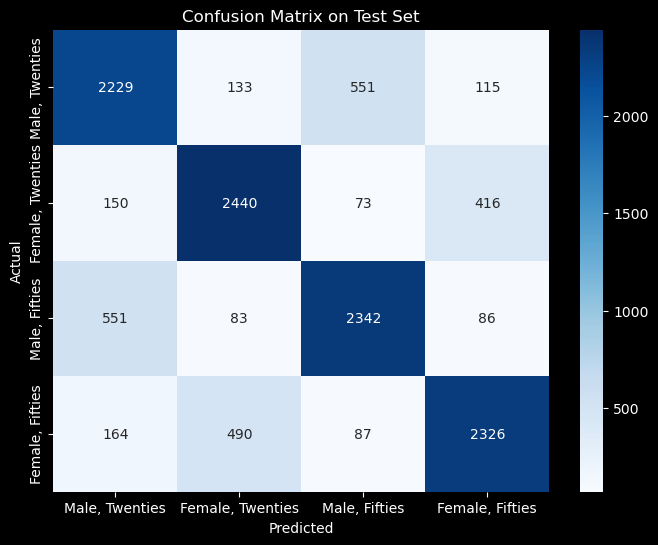

NameError: name 'best_svm_params' is not defined

In [ ]:
X_combined = pd.concat([X_train_scaled_all, X_val_scaled_all])
y_combined = pd.concat([y_train, y_val])
# best_svm_params={'C': 5.248266984711794, 'kernel': 'rbf', 'gamma': 'scale'}
# Train best model on full combined set
best_svm_model = SVC(C= 5.248266984711794, kernel='rbf', gamma= 'scale')
best_svm_model.fit(X_combined, y_combined)

# ------------------------------
# 3. EVALUATE ON TEST SET
# ------------------------------
y_test_pred = best_svm_model.predict(X_test_scaled_all)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_acc:.4f}")
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix on Test Set")
plt.show()

# # ------------------------------
# # 4. LEARNING CURVE PLOT USING ORIGINAL TRAINING DATA ONLY
# # # ------------------------------
train_sizes = np.linspace(0.1, 1.0, 10)

svm_for_curve = SVC(C= 5.248266984711794, kernel='rbf', gamma= 'scale')
train_sizes, train_scores, val_scores = learning_curve(
    estimator=svm_for_curve,
    X=X_train_scaled_all,
    y=y_train,
    train_sizes=train_sizes,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
)

# Mean & Std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker="o", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, val_mean, label="Validation Accuracy", marker="s", color="orange")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color="orange")

plt.title("Learning Curve for Best SVM Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Test Accuracy: 0.7631
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73      3028
           1       0.78      0.79      0.78      3079
           2       0.77      0.76      0.77      3062
           3       0.79      0.76      0.77      3067

    accuracy                           0.76     12236
   macro avg       0.76      0.76      0.76     12236
weighted avg       0.76      0.76      0.76     12236



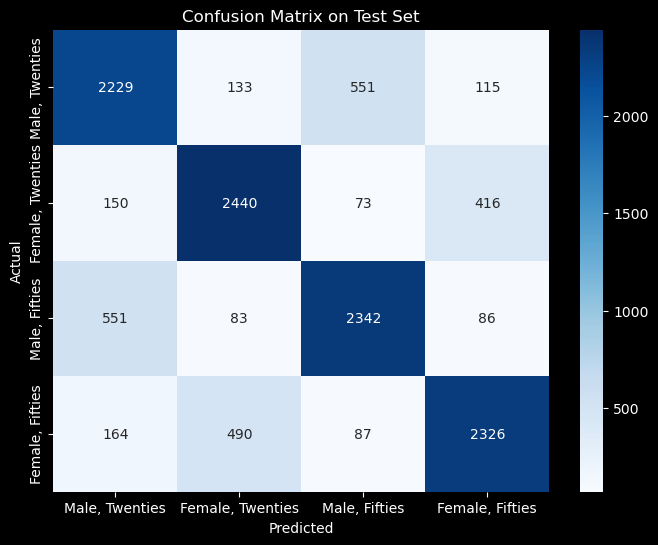

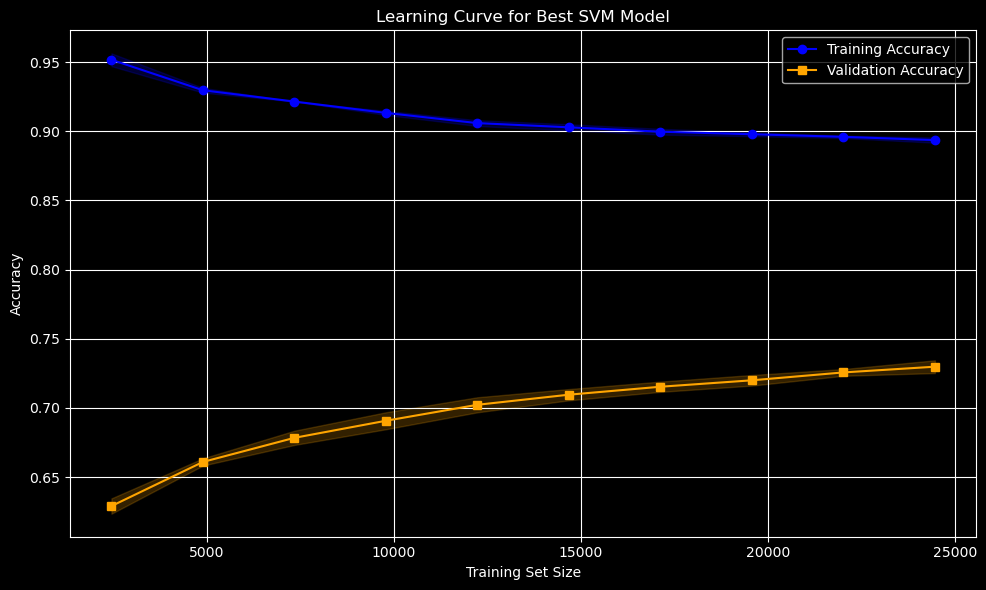

In [31]:
y_test_pred = best_svm_model.predict(X_test_scaled_all)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_acc:.4f}")
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix on Test Set")
plt.show()

# # ------------------------------
# # 4. LEARNING CURVE PLOT USING ORIGINAL TRAINING DATA ONLY
# # # ------------------------------
train_sizes = np.linspace(0.1, 1.0, 10)

svm_for_curve = SVC(C= 5.248266984711794, kernel='rbf', gamma= 'scale')
train_sizes, train_scores, val_scores = learning_curve(
    estimator=svm_for_curve,
    X=X_train_scaled_all,
    y=y_train,
    train_sizes=train_sizes,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
)

# Mean & Std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker="o", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, val_mean, label="Validation Accuracy", marker="s", color="orange")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color="orange")

plt.title("Learning Curve for Best SVM Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
import joblib

# # Save the base models
# joblib.dump(best_svm_model, './svm_model.pkl')

# joblib.dump(scaler, './scaler.pkl')
model=joblib.load('svm_model.pkl')
y=model.predict(X_test_scaled_all)
cm = confusion_matrix(y_test, y)
cm

array([[2229,  133,  551,  115],
       [ 150, 2440,   73,  416],
       [ 551,   83, 2342,   86],
       [ 164,  490,   87, 2326]], dtype=int64)

In [31]:
y_test

0        2
1        1
2        3
3        3
4        2
        ..
12231    3
12232    1
12233    1
12234    0
12235    2
Name: label, Length: 12236, dtype: int64

In [34]:
y2=model.predict(X_val_scaled_all)
cm = accuracy_score(y_val, y2)
cm

0.8829587249693502

-----------------

Naive_bayes

[I 2025-05-03 20:51:38,555] A new study created in memory with name: no-name-36c382b7-1d39-4fed-94d4-21f001305b11


[I 2025-05-03 20:51:38,697] Trial 0 finished with value: 0.5324887617490806 and parameters: {'var_smoothing': 2.2272684498735897e-11}. Best is trial 0 with value: 0.5324887617490806.
[I 2025-05-03 20:51:38,709] Trial 1 finished with value: 0.5324887617490806 and parameters: {'var_smoothing': 4.736209745515337e-08}. Best is trial 0 with value: 0.5324887617490806.
[I 2025-05-03 20:51:38,790] Trial 2 finished with value: 0.5324887617490806 and parameters: {'var_smoothing': 2.340122836411552e-09}. Best is trial 0 with value: 0.5324887617490806.
[I 2025-05-03 20:51:38,799] Trial 3 finished with value: 0.5324887617490806 and parameters: {'var_smoothing': 5.501602216781415e-10}. Best is trial 0 with value: 0.5324887617490806.
[I 2025-05-03 20:51:38,878] Trial 4 finished with value: 0.5324887617490806 and parameters: {'var_smoothing': 1.6591093520566891e-09}. Best is trial 0 with value: 0.5324887617490806.
[I 2025-05-03 20:51:38,892] Trial 5 finished with value: 0.5324887617490806 and paramete

Best GaussianNB Parameters from Optuna: {'var_smoothing': 2.2272684498735897e-11}

Test Accuracy: 0.5348
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.47      0.49      3028
           1       0.56      0.61      0.58      3079
           2       0.56      0.59      0.57      3062
           3       0.49      0.48      0.49      3067

    accuracy                           0.53     12236
   macro avg       0.53      0.53      0.53     12236
weighted avg       0.53      0.53      0.53     12236



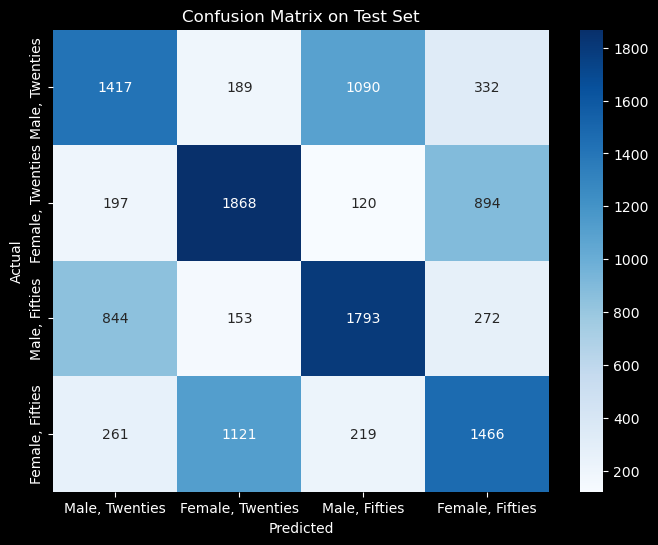

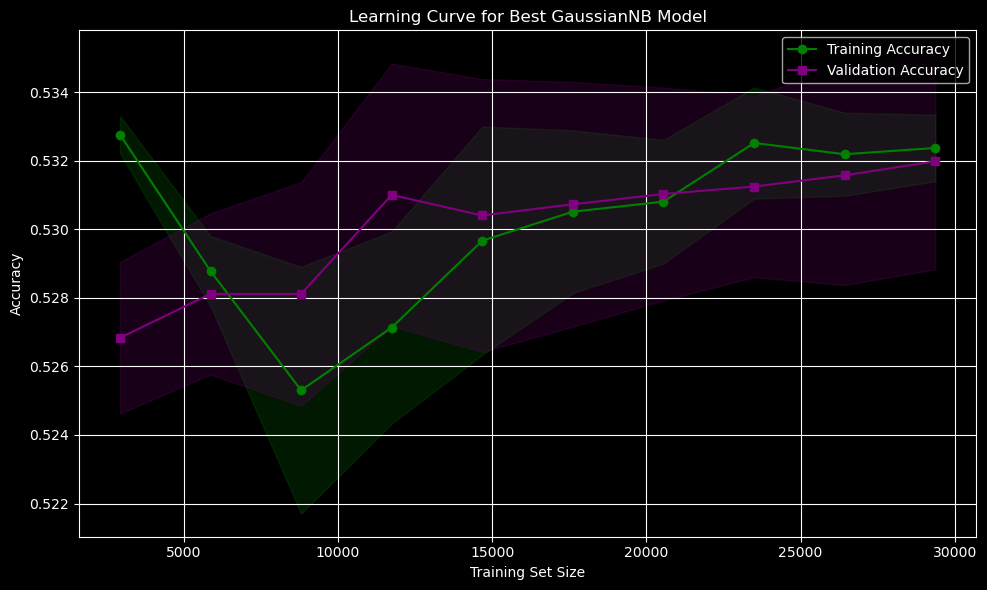

In [27]:
from sklearn.naive_bayes import GaussianNB
# ------------------------------
# 1. OPTUNA GAUSSIANNB HYPERPARAMETER TUNING
# ------------------------------
def objective_nb(trial):
    var_smoothing = trial.suggest_float("var_smoothing", 1e-11, 1e-7, log=True)

    model = GaussianNB(var_smoothing=var_smoothing)
    model.fit(X_train_scaled_all, y_train)
    y_val_pred = model.predict(X_val_scaled_all)
    return accuracy_score(y_val, y_val_pred)

study_nb = optuna.create_study(direction="maximize")
study_nb.optimize(objective_nb, n_trials=200, n_jobs=2)

best_nb_params = study_nb.best_params
print("Best GaussianNB Parameters from Optuna:", best_nb_params)

# ------------------------------
# 2. TRAIN BEST NB ON FULL TRAIN + VALIDATION DATA
# ------------------------------
X_combined = pd.concat([X_train_scaled_all, X_val_scaled_all])
y_combined = pd.concat([y_train, y_val])

best_nb_model = GaussianNB(**best_nb_params)
best_nb_model.fit(X_combined, y_combined)

# ------------------------------
# 3. EVALUATE ON TEST SET
# ------------------------------
y_test_pred = best_nb_model.predict(X_test_scaled_all)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_acc:.4f}")
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix on Test Set")
plt.show()

# ------------------------------
# 4. LEARNING CURVE PLOT USING ORIGINAL TRAINING DATA ONLY
# ------------------------------
train_sizes = np.linspace(0.1, 1.0, 10)

nb_for_curve = GaussianNB(**best_nb_params)
train_sizes, train_scores, val_scores = learning_curve(
    estimator=nb_for_curve,
    X=X_train_scaled_all,
    y=y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker="o", color="green")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="green")

plt.plot(train_sizes, val_mean, label="Validation Accuracy", marker="s", color="purple")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color="purple")

plt.title("Learning Curve for Best GaussianNB Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

--------------

**_Logistic_**

[I 2025-05-03 20:54:55,509] A new study created in memory with name: no-name-b7fe7048-ac36-4a93-b798-e3ca86dfb8be
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[I 2025-05-03 20:54:56,199] Trial 1 finished with value: 0.5620760114425828 and parameters: {'C': 5.036415793181215}. Best is trial 1 with value: 0.5620760114425828.
[I 2025-05-03 20:54:56,205] Trial 0 finished with value: 0.5624846751123825 and parameters: {'C': 0.024306014268230085}. Best is trial 0 with valu

Best Logistic Regression Parameters from Optuna: {'C': 0.01719140409365667}

Test Accuracy: 0.5691
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.55      0.56      3028
           1       0.59      0.63      0.61      3079
           2       0.58      0.58      0.58      3062
           3       0.54      0.51      0.53      3067

    accuracy                           0.57     12236
   macro avg       0.57      0.57      0.57     12236
weighted avg       0.57      0.57      0.57     12236



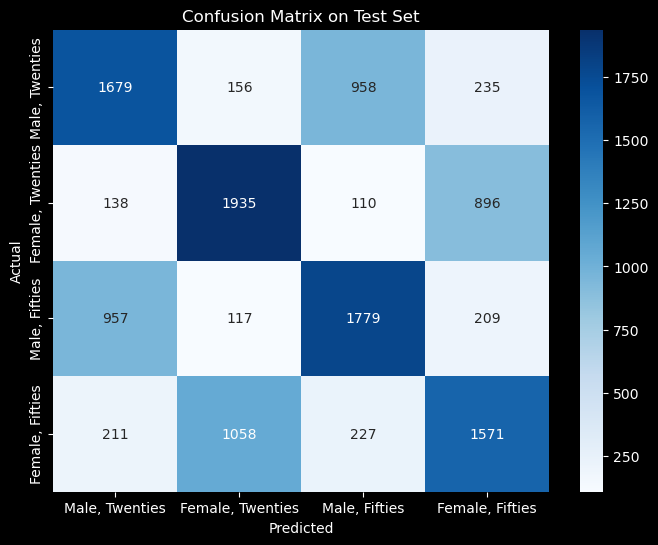

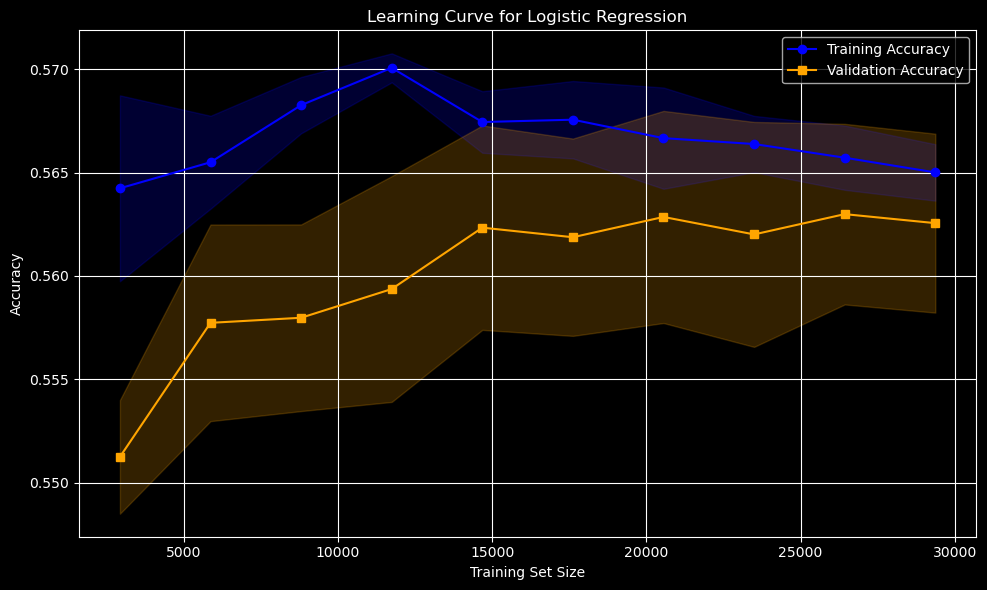

In [29]:
# ------------------------------
# 1. OPTUNA LOGISTIC REGRESSION HYPERPARAMETER TUNING
# ------------------------------
from sklearn.linear_model import LogisticRegression


def objective_logreg(trial):
    param = {
        "C": trial.suggest_float("C", 1e-4, 10.0, log=True),
        "solver": "lbfgs",
        'multi_class':'multinomial',
        "max_iter": 1000,
        "random_state": 42
    }

    model = LogisticRegression(**param)
    model.fit(X_train_scaled_all, y_train)
    y_val_pred = model.predict(X_val_scaled_all)
    return accuracy_score(y_val, y_val_pred)

study_logreg = optuna.create_study(direction="maximize")
study_logreg.optimize(objective_logreg, n_trials=200,n_jobs=2)

best_logreg_params = study_logreg.best_params
print("Best Logistic Regression Parameters from Optuna:", best_logreg_params)

# ------------------------------
# 2. TRAIN BEST LOGISTIC MODEL ON FULL TRAIN + VALIDATION DATA
# ------------------------------
X_combined = pd.concat([X_train_scaled_all, X_val_scaled_all])
y_combined = pd.concat([y_train, y_val])

best_logreg_model = LogisticRegression(
    **best_logreg_params,
    solver='lbfgs',
    multi_class='multinomial',
    max_iter=1000,
    random_state=42
)

best_logreg_model.fit(X_combined, y_combined)

# ------------------------------
# 3. EVALUATE ON TEST SET
# ------------------------------
y_test_pred = best_logreg_model.predict(X_test_scaled_all)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_acc:.4f}")
print("Classification Report:\n", classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix on Test Set")
plt.show()

# ------------------------------
# 4. LEARNING CURVE PLOT
# ------------------------------
train_sizes = np.linspace(0.1, 1.0, 10)

logreg_for_curve = LogisticRegression(
    **best_logreg_params,
    solver='lbfgs',
    multi_class='multinomial',
    max_iter=1000,
    random_state=42
)

train_sizes, train_scores, val_scores = learning_curve(
    estimator=logreg_for_curve,
    X=X_train_scaled_all,
    y=y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker="o", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, val_mean, label="Validation Accuracy", marker="s", color="orange")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color="orange")

plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


-------------

**_KNN_**

[I 2025-05-03 21:27:19,383] A new study created in memory with name: no-name-da97ece5-cc78-45d5-9e14-5dab563f17eb
[I 2025-05-03 21:27:24,430] Trial 1 finished with value: 0.7053534940743768 and parameters: {'n_neighbors': 30, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 1 with value: 0.7053534940743768.
[I 2025-05-03 21:27:41,795] Trial 0 finished with value: 0.7043727012668574 and parameters: {'n_neighbors': 8, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 1 with value: 0.7053534940743768.
[I 2025-05-03 21:27:45,468] Trial 2 finished with value: 0.701675521046179 and parameters: {'n_neighbors': 18, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 1 with value: 0.7053534940743768.
[I 2025-05-03 21:27:49,754] Trial 4 finished with value: 0.7194115243154884 and parameters: {'n_neighbors': 8, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 4 with value: 0.7194115243154884.
[I 2025-05-03 21:27:53,699] Trial 5 finished with value: 0.72235

Best parameters found for KNN: {'n_neighbors': 11, 'weights': 'uniform', 'metric': 'euclidean'}

Test Accuracy for KNN: 0.7292
Test Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.73      0.60      0.66      3028
           1       0.73      0.79      0.76      3079
           2       0.72      0.78      0.75      3062
           3       0.74      0.74      0.74      3067

    accuracy                           0.73     12236
   macro avg       0.73      0.73      0.73     12236
weighted avg       0.73      0.73      0.73     12236



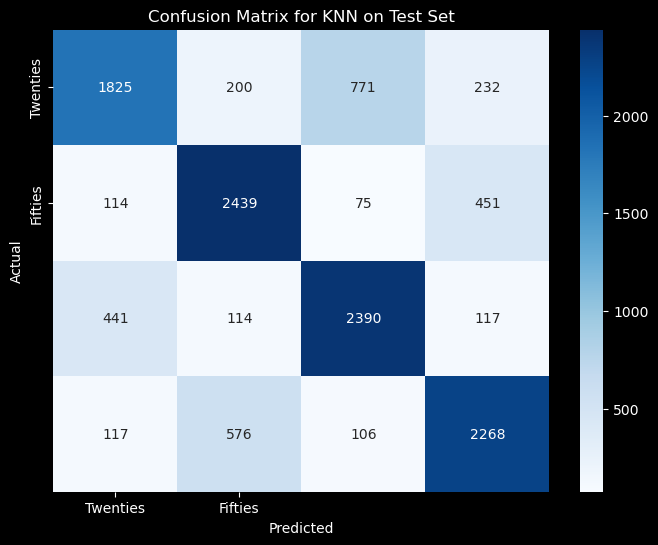

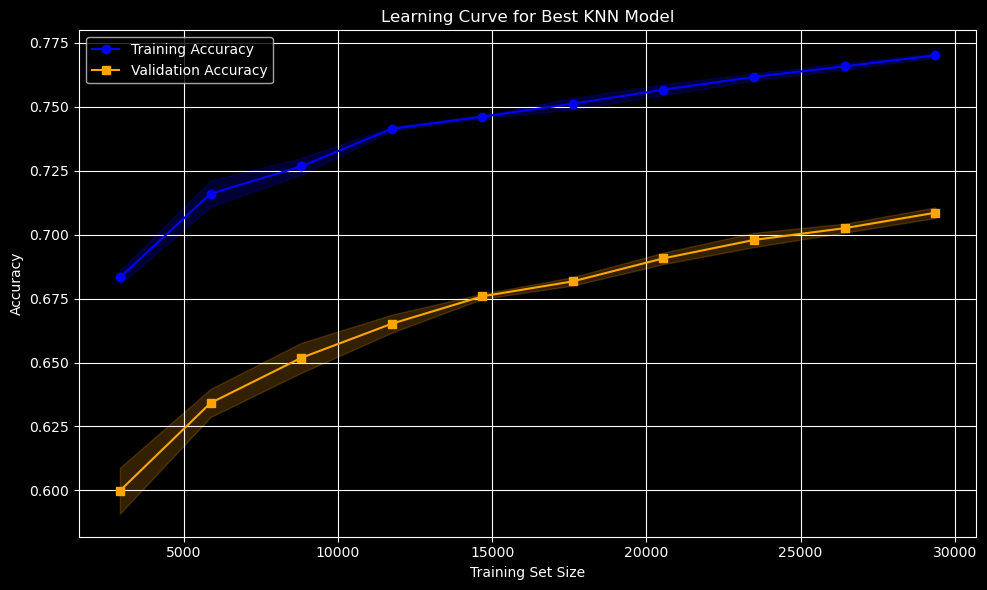

In [29]:
# ------------------------------
# 1. OPTUNA KNN HYPERPARAMETER TUNING
# ------------------------------
def objective_knn(trial):
    # Define the hyperparameter space for KNN
    param = {
        'n_neighbors': trial.suggest_int('n_neighbors', 1, 50),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'metric': trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski']),
    }

    # Initialize the KNN model
    knn_model = KNeighborsClassifier(**param)

    # Train on the training set and validate on the validation set
    knn_model.fit(X_train_scaled_all, y_train)
    y_val_pred = knn_model.predict(X_val_scaled_all)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    return val_accuracy

# Create a study object and optimize the objective function
study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=50, n_jobs=2)

# Get the best parameters from the study
best_knn_params = study_knn.best_params
print(f"Best parameters found for KNN: {best_knn_params}")

# ------------------------------
# 2. TRAIN BEST KNN ON FULL TRAIN + VALIDATION DATA
# ------------------------------
# Combine training and validation sets for final training
X_combined_knn = pd.concat([X_train_scaled_all, X_val_scaled_all])
y_combined_knn = pd.concat([y_train, y_val])

# Train best KNN model on full combined set
best_knn_model = KNeighborsClassifier(**best_knn_params)
best_knn_model.fit(X_combined_knn, y_combined_knn)

# ------------------------------
# 3. EVALUATE ON TEST SET
# ------------------------------
y_test_pred_knn = best_knn_model.predict(X_test_scaled_all)
test_acc_knn = accuracy_score(y_test, y_test_pred_knn)
print(f"\nTest Accuracy for KNN: {test_acc_knn:.4f}")
print("Test Classification Report for KNN:\n", classification_report(y_test, y_test_pred_knn))

# Confusion matrix
cm_knn = confusion_matrix(y_test, y_test_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=label_names_age, yticklabels=label_names_age)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for KNN on Test Set")
plt.show()

# ------------------------------
# 4. LEARNING CURVE PLOT USING ORIGINAL TRAINING DATA ONLY
# ------------------------------
train_sizes = np.linspace(0.1, 1.0, 10)

knn_for_curve = KNeighborsClassifier(**best_knn_params)
train_sizes, train_scores, val_scores = learning_curve(
    estimator=knn_for_curve,
    X=X_train_scaled_all,
    y=y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)

# Mean & Std
train_mean_knn = np.mean(train_scores, axis=1)
train_std_knn = np.std(train_scores, axis=1)
val_mean_knn = np.mean(val_scores, axis=1)
val_std_knn = np.std(val_scores, axis=1)

# Plot learning curve for KNN
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean_knn, label="Training Accuracy", marker="o", color="blue")
plt.fill_between(train_sizes, train_mean_knn - train_std_knn, train_mean_knn + train_std_knn, alpha=0.2, color="blue")

plt.plot(train_sizes, val_mean_knn, label="Validation Accuracy", marker="s", color="orange")
plt.fill_between(train_sizes, val_mean_knn - val_std_knn, val_mean_knn + val_std_knn, alpha=0.2, color="orange")

plt.title("Learning Curve for Best KNN Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


-------------------

**_Random Forest_**

In [ ]:
# # ------------------------------
# # 1. OPTUNA RANDOM FOREST HYPERPARAMETER TUNING
# # ------------------------------
# def objective_rf(trial):
#     # Define the hyperparameter space for Random Forest
#     param = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 300),
#         'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
#      'max_depth': trial.suggest_int('max_depth', 3, 50),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
#     }

#     # Initialize the Random Forest model
#     rf_model = RandomForestClassifier(**param, random_state=42)

#     # Train on the training set and validate on the validation set
#     rf_model.fit(X_train_scaled_all, y_train)
#     y_val_pred = rf_model.predict(X_val_scaled_all)
#     val_accuracy = accuracy_score(y_val, y_val_pred)

#     return val_accuracy

# # Create a study object and optimize the objective function
# study_rf = optuna.create_study(direction='maximize')
# study_rf.optimize(objective_rf, n_trials=30, n_jobs=2)

# # Get the best parameters from the study
# best_rf_params = study_rf.best_params
# print(f"Best parameters found for Random Forest: {best_rf_params}")

# # ------------------------------
# # 2. TRAIN BEST RANDOM FOREST ON FULL TRAIN + VALIDATION DATA
# # ------------------------------
# # Combine training and validation sets for final training
# X_combined_rf = pd.concat([X_train_scaled_all, X_val_scaled_all])
# y_combined_rf = pd.concat([y_train, y_val])

# # Train best Random Forest model on full combined set
# best_rf_model = RandomForestClassifier(**best_rf_params, random_state=42)
# best_rf_model.fit(X_combined_rf, y_combined_rf)

# # ------------------------------
# # 3. EVALUATE ON TEST SET
# # ------------------------------
# y_test_pred_rf = best_rf_model.predict(X_test_scaled_all)
# test_acc_rf = accuracy_score(y_test, y_test_pred_rf)
# print(f"\nTest Accuracy for Random Forest: {test_acc_rf:.4f}")
# print("Test Classification Report for Random Forest:\n", classification_report(y_test, y_test_pred_rf))

# # Confusion matrix
# cm_rf = confusion_matrix(y_test, y_test_pred_rf)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix for Random Forest on Test Set")
# plt.show()

# # ------------------------------
# # 4. LEARNING CURVE PLOT USING ORIGINAL TRAINING DATA ONLY
# # ------------------------------
# train_sizes = np.linspace(0.1, 1.0, 10)

# rf_for_curve = RandomForestClassifier(**best_rf_params, random_state=42)
# train_sizes, train_scores, val_scores = learning_curve(
#     estimator=rf_for_curve,
#     X=X_train_scaled_all,
#     y=y_train,
#     train_sizes=train_sizes,
#     cv=5,
#     scoring="accuracy",
#     n_jobs=-1,
# )

# # Mean & Std
# train_mean_rf = np.mean(train_scores, axis=1)
# train_std_rf = np.std(train_scores, axis=1)
# val_mean_rf = np.mean(val_scores, axis=1)
# val_std_rf = np.std(val_scores, axis=1)

# # Plot learning curve for Random Forest
# plt.figure(figsize=(10, 6))
# plt.plot(train_sizes, train_mean_rf, label="Training Accuracy", marker="o", color="blue")
# plt.fill_between(train_sizes, train_mean_rf - train_std_rf, train_mean_rf + train_std_rf, alpha=0.2, color="blue")

# plt.plot(train_sizes, val_mean_rf, label="Validation Accuracy", marker="s", color="orange")
# plt.fill_between(train_sizes, val_mean_rf - val_std_rf, val_mean_rf + val_std_rf, alpha=0.2, color="orange")

# plt.title("Learning Curve for Best Random Forest Model")
# plt.xlabel("Training Set Size")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

[I 2025-05-02 14:29:48,379] A new study created in memory with name: no-name-8bcd44eb-b4e6-461e-9e55-5d49b4265153
[I 2025-05-02 14:30:32,095] Trial 0 finished with value: 1.0 and parameters: {'n_estimators': 166, 'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 15, 'min_samples_leaf': 14}. Best is trial 0 with value: 1.0.
[I 2025-05-02 14:30:33,472] Trial 1 finished with value: 1.0 and parameters: {'n_estimators': 169, 'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 14}. Best is trial 0 with value: 1.0.
[I 2025-05-02 14:30:54,806] Trial 3 finished with value: 1.0 and parameters: {'n_estimators': 78, 'criterion': 'entropy', 'max_depth': 31, 'min_samples_split': 12, 'min_samples_leaf': 6}. Best is trial 0 with value: 1.0.
[I 2025-05-02 14:31:34,593] Trial 2 finished with value: 1.0 and parameters: {'n_estimators': 223, 'criterion': 'entropy', 'max_depth': 50, 'min_samples_split': 13, 'min_samples_leaf': 8}. Best is trial 0 with value: 1.0

KeyboardInterrupt: 

-----------------------

**_Xgboost_**

[I 2025-05-03 18:59:26,921] A new study created in memory with name: no-name-c56cd6c6-84b8-4357-b41a-a9b58b807661
[I 2025-05-03 18:59:37,174] Trial 0 finished with value: 0.6498569677155701 and parameters: {'n_estimators': 298, 'max_depth': 3, 'learning_rate': 0.17783201058949766, 'subsample': 0.7571737452031337, 'colsample_bytree': 0.5595297965351409, 'gamma': 0.3717144745450607, 'reg_alpha': 0.8969937382021265, 'reg_lambda': 0.7876682589765241}. Best is trial 0 with value: 0.6498569677155701.
[I 2025-05-03 18:59:40,123] Trial 1 finished with value: 0.6730690641601962 and parameters: {'n_estimators': 423, 'max_depth': 5, 'learning_rate': 0.2462847931694102, 'subsample': 0.9969299050968952, 'colsample_bytree': 0.7883756108108344, 'gamma': 0.7038886378159995, 'reg_alpha': 0.19749863964651548, 'reg_lambda': 0.13411201512395465}. Best is trial 1 with value: 0.6730690641601962.
[I 2025-05-03 18:59:45,799] Trial 3 finished with value: 0.6052308949734369 and parameters: {'n_estimators': 66, 

Best parameters found for XGBoost: {'n_estimators': 408, 'max_depth': 10, 'learning_rate': 0.062148108260806065, 'subsample': 0.5542074860029231, 'colsample_bytree': 0.7211929648478471, 'gamma': 0.5081645806186266, 'reg_alpha': 0.38036087407291214, 'reg_lambda': 0.7023921097292761}

Test Accuracy for XGBoost: 0.7269
Test Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69      3028
           1       0.74      0.77      0.75      3079
           2       0.73      0.73      0.73      3062
           3       0.75      0.72      0.73      3067

    accuracy                           0.73     12236
   macro avg       0.73      0.73      0.73     12236
weighted avg       0.73      0.73      0.73     12236



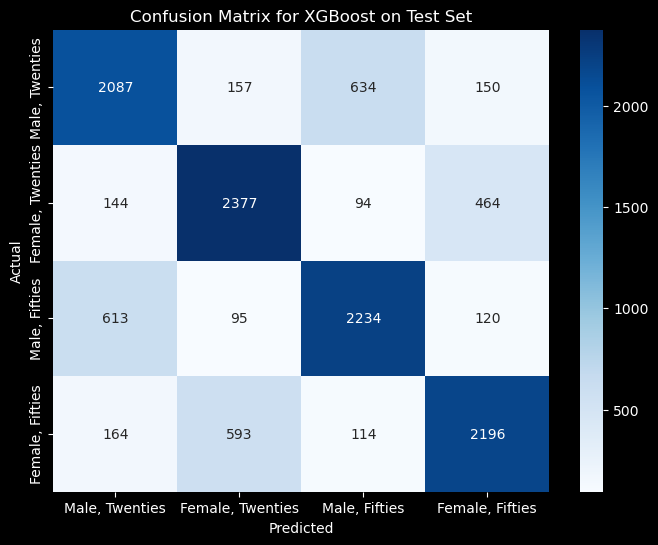

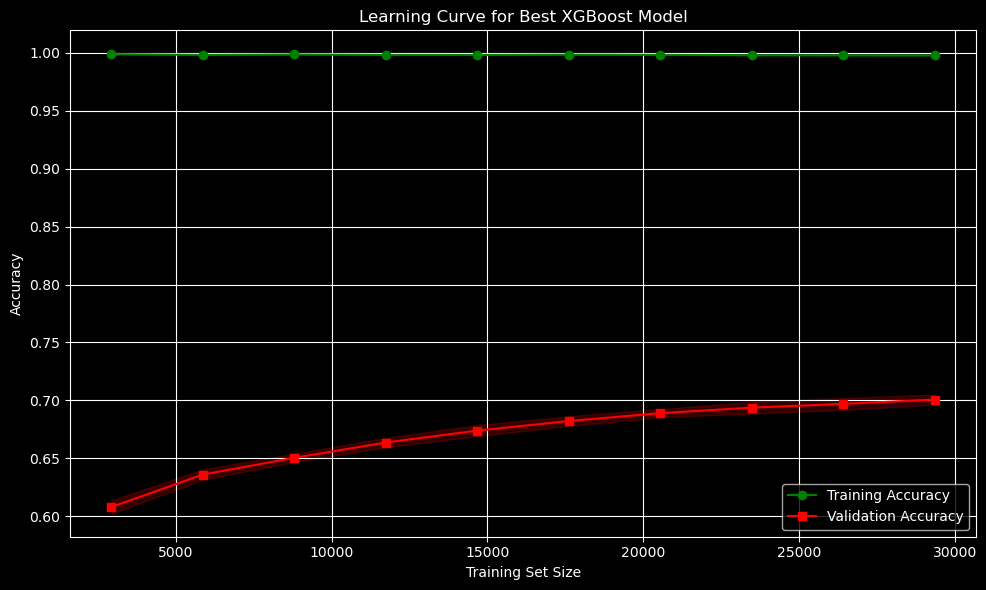

In [32]:
from xgboost import XGBClassifier
# ------------------------------
# 1. OPTUNA XGBOOST HYPERPARAMETER TUNING
# ------------------------------
def objective_xgb(trial):
    # Define hyperparameter space
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 1),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
        'use_label_encoder': False,
        'eval_metric': 'mlogloss'
    }

    # Train model
    xgb_model = XGBClassifier(**param)
    xgb_model.fit(X_train_scaled_all, y_train)
    y_val_pred = xgb_model.predict(X_val_scaled_all)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    return val_accuracy

# Run Optuna Study
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=30, n_jobs=2)

# Best parameters
best_xgb_params = study_xgb.best_params
print(f"Best parameters found for XGBoost: {best_xgb_params}")

# ------------------------------
# 2. TRAIN BEST XGBOOST ON FULL TRAIN + VALIDATION DATA
# ------------------------------
# Combine train and validation
X_combined_xgb = pd.concat([X_train_scaled_all, X_val_scaled_all])
y_combined_xgb = pd.concat([y_train, y_val])

# Train final model
best_xgb_model = XGBClassifier(**best_xgb_params, use_label_encoder=False, eval_metric='mlogloss')
best_xgb_model.fit(X_combined_xgb, y_combined_xgb)

# ------------------------------
# 3. EVALUATE ON TEST SET
# ------------------------------
y_test_pred_xgb = best_xgb_model.predict(X_test_scaled_all)
test_acc_xgb = accuracy_score(y_test, y_test_pred_xgb)
print(f"\nTest Accuracy for XGBoost: {test_acc_xgb:.4f}")
print("Test Classification Report for XGBoost:\n", classification_report(y_test, y_test_pred_xgb))

# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XGBoost on Test Set")
plt.show()

# ------------------------------
# 4. LEARNING CURVE PLOT USING ORIGINAL TRAINING DATA ONLY
# ------------------------------
train_sizes = np.linspace(0.1, 1.0, 10)

xgb_for_curve = XGBClassifier(**best_xgb_params, use_label_encoder=False, eval_metric='mlogloss')
train_sizes, train_scores, val_scores = learning_curve(
    estimator=xgb_for_curve,
    X=X_train_scaled_all,
    y=y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)

# Mean & Std
train_mean_xgb = np.mean(train_scores, axis=1)
train_std_xgb = np.std(train_scores, axis=1)
val_mean_xgb = np.mean(val_scores, axis=1)
val_std_xgb = np.std(val_scores, axis=1)

# Plot learning curve for XGBoost
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean_xgb, label="Training Accuracy", marker="o", color="green")
plt.fill_between(train_sizes, train_mean_xgb - train_std_xgb, train_mean_xgb + train_std_xgb, alpha=0.2, color="green")

plt.plot(train_sizes, val_mean_xgb, label="Validation Accuracy", marker="s", color="red")
plt.fill_between(train_sizes, val_mean_xgb - val_std_xgb, val_mean_xgb + val_std_xgb, alpha=0.2, color="red")

plt.title("Learning Curve for Best XGBoost Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
# X_train = train_df.drop('label', axis=1)
# y_train = train_df['label']

# X_val = val_df.drop('label', axis=1)
# y_val = val_df['label']

# X_test = test_df.drop('label', axis=1)
# y_test = test_df['label']

# # Step 2: Print shapes
# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)

# print("X_val shape:", X_val.shape)
# print("y_val shape:", y_val.shape)

# print("X_test shape:", X_test.shape)
# print("y_test shape:", y_test.shape)

# # Step 3: Define the selected features to keep
# selected_features = [
#     'pitch',
#     'chroma_0', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5',
#     'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11',
#     'mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6',
#     'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12',
#     'age'
# ]

# # Step 4: Filter datasets to keep only selected features
# X_train_filtered = X_train[selected_features]
# X_val_filtered = X_val[selected_features]
# X_test_filtered = X_test[selected_features]

# # Step 5: Scaling function
# scaler = StandardScaler()
# def scale_features(X_train, X_val, X_test):
    
    
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_val_scaled = scaler.transform(X_val)
#     X_test_scaled = scaler.transform(X_test)
    
#     X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
#     X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns)
#     X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
#     return X_train_scaled_df, X_val_scaled_df, X_test_scaled_df

# # Step 6: Apply scaling
# X_train_scaled, X_val_scaled, X_test_scaled = scale_features(
#     X_train_filtered, X_val_filtered, X_test_filtered
# )

# # Final confirmation print
# print("Filtered and scaled shapes:")
# print("X_train_scaled:", X_train_scaled.shape)
# print("X_val_scaled:", X_val_scaled.shape)
# print("X_test_scaled:", X_test_scaled.shape)


# Step 1: Split features and labels
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Split data into X and y
X_train = train_df.drop('label', axis=1)
y_train = train_df['label']
y_train_age=    train_df['age']
y_train_gender=    train_df['gender']

X_val = val_df.drop('label', axis=1)
y_val = val_df['label']
y_val_age=    val_df['age']
y_val_gender=    val_df['gender']



X_test = test_df.drop('label', axis=1)
y_test = test_df['label']
y_test_age=    test_df['age']
y_test_gender=    test_df['gender']

common_features = [
    'pitch',
    # 'chroma_0', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5',
    # 'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11',
    'mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6',
    'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12'
]

# Step 2: Scale everything first
scaler = StandardScaler()
X_train_scaled_all = pd.DataFrame(scaler.fit_transform(X_train[common_features]), columns=common_features)
X_val_scaled_all = pd.DataFrame(scaler.transform(X_val[common_features]), columns=common_features)
X_test_scaled_all = pd.DataFrame(scaler.transform(X_test[common_features]), columns=common_features)

# # Step 3: Define common features
# common_features = [
#     'pitch',
#     'chroma_0', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5',
#     'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11',
#     'mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6',
#     'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12'
# ]

# # Step 4: Define three feature sets
# features_gender = common_features + ['gender']
# features_age = common_features + ['age']
# features_both = common_features + ['gender', 'age']

# # Step 5: Prepare the 3 scaled versions
# X_train_gender = X_train_scaled_all[features_gender]
# X_val_gender = X_val_scaled_all[features_gender]
# X_test_gender = X_test_scaled_all[features_gender]

# X_train_age = X_train_scaled_all[features_age]
# X_val_age = X_val_scaled_all[features_age]
# X_test_age = X_test_scaled_all[features_age]

# X_train_both = X_train_scaled_all[features_both]
# X_val_both = X_val_scaled_all[features_both]
# X_test_both = X_test_scaled_all[features_both]

# Optional: Confirm dimensions
print("With Gender:", X_train_scaled_all.shape)
print("With Age:", X_val_scaled_all.shape)
print("With Both:", X_test_scaled_all.shape)


With Gender: (36706, 14)
With Age: (12235, 14)
With Both: (12236, 14)


[I 2025-05-03 19:24:59,562] A new study created in memory with name: no-name-240e4918-43b9-435e-9e4f-3957c209bb9c
[I 2025-05-03 19:25:15,445] Trial 0 finished with value: 0.6568042501021659 and parameters: {'n_estimators': 236, 'max_depth': 9, 'learning_rate': 0.22750468729808732, 'subsample': 0.7568735490007461, 'colsample_bytree': 0.9768639268657419, 'gamma': 0.571953864586596, 'reg_alpha': 0.7601925962892303, 'reg_lambda': 0.8640856872238747}. Best is trial 0 with value: 0.6568042501021659.
[I 2025-05-03 19:25:20,407] Trial 1 finished with value: 0.5937065794850838 and parameters: {'n_estimators': 469, 'max_depth': 4, 'learning_rate': 0.03528849640681335, 'subsample': 0.7221185024492252, 'colsample_bytree': 0.5001540188930844, 'gamma': 0.9519195723145063, 'reg_alpha': 0.22139928424045263, 'reg_lambda': 0.3108616251202885}. Best is trial 0 with value: 0.6568042501021659.
[I 2025-05-03 19:25:33,985] Trial 3 finished with value: 0.6335921536575398 and parameters: {'n_estimators': 98, '

Best parameters found for XGBoost: {'n_estimators': 499, 'max_depth': 10, 'learning_rate': 0.06693460590626692, 'subsample': 0.5754604859465833, 'colsample_bytree': 0.9340270559391374, 'gamma': 0.011595732332930209, 'reg_alpha': 0.6772849561430033, 'reg_lambda': 0.26362608717974423}

Test Accuracy for XGBoost: 0.6817
Test Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.63      0.62      0.63      3028
           1       0.68      0.72      0.70      3079
           2       0.68      0.69      0.68      3062
           3       0.72      0.70      0.71      3067

    accuracy                           0.68     12236
   macro avg       0.68      0.68      0.68     12236
weighted avg       0.68      0.68      0.68     12236



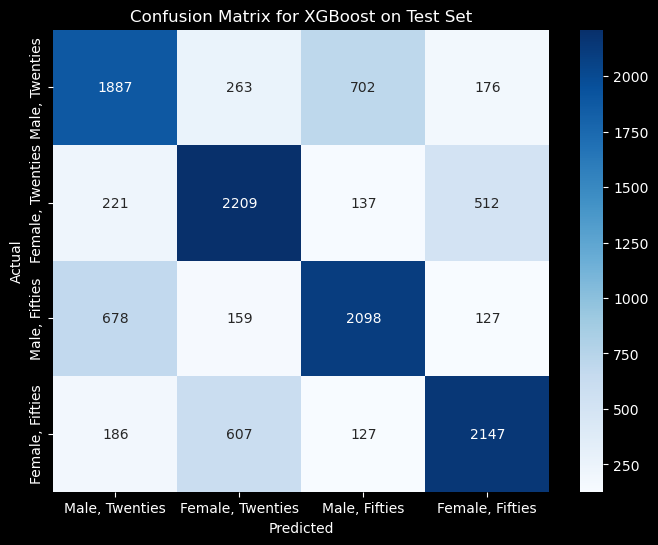

KeyboardInterrupt: 

In [34]:
from xgboost import XGBClassifier
# ------------------------------
# 1. OPTUNA XGBOOST HYPERPARAMETER TUNING
# ------------------------------
def objective_xgb(trial):
    # Define hyperparameter space
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 1),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
        'use_label_encoder': False,
        'eval_metric': 'mlogloss'
    }

    # Train model
    xgb_model = XGBClassifier(**param)
    xgb_model.fit(X_train_scaled_all, y_train)
    y_val_pred = xgb_model.predict(X_val_scaled_all)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    return val_accuracy

# Run Optuna Study
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=30, n_jobs=2)

# Best parameters
best_xgb_params = study_xgb.best_params
print(f"Best parameters found for XGBoost: {best_xgb_params}")

# ------------------------------
# 2. TRAIN BEST XGBOOST ON FULL TRAIN + VALIDATION DATA
# ------------------------------
# Combine train and validation
X_combined_xgb = pd.concat([X_train_scaled_all, X_val_scaled_all])
y_combined_xgb = pd.concat([y_train, y_val])

# Train final model
best_xgb_model = XGBClassifier(**best_xgb_params, use_label_encoder=False, eval_metric='mlogloss')
best_xgb_model.fit(X_combined_xgb, y_combined_xgb)

# ------------------------------
# 3. EVALUATE ON TEST SET
# ------------------------------
y_test_pred_xgb = best_xgb_model.predict(X_test_scaled_all)
test_acc_xgb = accuracy_score(y_test, y_test_pred_xgb)
print(f"\nTest Accuracy for XGBoost: {test_acc_xgb:.4f}")
print("Test Classification Report for XGBoost:\n", classification_report(y_test, y_test_pred_xgb))

# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XGBoost on Test Set")
plt.show()

# ------------------------------
# 4. LEARNING CURVE PLOT USING ORIGINAL TRAINING DATA ONLY
# ------------------------------
train_sizes = np.linspace(0.1, 1.0, 10)

xgb_for_curve = XGBClassifier(**best_xgb_params, use_label_encoder=False, eval_metric='mlogloss')
train_sizes, train_scores, val_scores = learning_curve(
    estimator=xgb_for_curve,
    X=X_train_scaled_all,
    y=y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)

# Mean & Std
train_mean_xgb = np.mean(train_scores, axis=1)
train_std_xgb = np.std(train_scores, axis=1)
val_mean_xgb = np.mean(val_scores, axis=1)
val_std_xgb = np.std(val_scores, axis=1)

# Plot learning curve for XGBoost
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean_xgb, label="Training Accuracy", marker="o", color="green")
plt.fill_between(train_sizes, train_mean_xgb - train_std_xgb, train_mean_xgb + train_std_xgb, alpha=0.2, color="green")

plt.plot(train_sizes, val_mean_xgb, label="Validation Accuracy", marker="s", color="red")
plt.fill_between(train_sizes, val_mean_xgb - val_std_xgb, val_mean_xgb + val_std_xgb, alpha=0.2, color="red")

plt.title("Learning Curve for Best XGBoost Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
! pip install lightgbm
! pip install catboost

**_Lightgm_**

[I 2025-05-03 21:01:22,357] A new study created in memory with name: no-name-75da5f16-91d7-4017-a1ca-0e2e4ecd86ee
[I 2025-05-03 21:01:27,924] Trial 1 finished with value: 0.6205966489579077 and parameters: {'n_estimators': 86, 'max_depth': 5, 'learning_rate': 0.04332982198676974, 'num_leaves': 62, 'subsample': 0.6148272092693778, 'colsample_bytree': 0.806521486996252, 'reg_alpha': 0.18974930416192715, 'reg_lambda': 0.9896643952346054}. Best is trial 1 with value: 0.6205966489579077.
[I 2025-05-03 21:01:31,251] Trial 0 finished with value: 0.6856559051900286 and parameters: {'n_estimators': 137, 'max_depth': 6, 'learning_rate': 0.28344544779698155, 'num_leaves': 54, 'subsample': 0.8478619872266073, 'colsample_bytree': 0.5959160985449501, 'reg_alpha': 0.3234789825766027, 'reg_lambda': 0.9677324241772837}. Best is trial 0 with value: 0.6856559051900286.
[I 2025-05-03 21:01:37,983] Trial 3 finished with value: 0.693257049448304 and parameters: {'n_estimators': 138, 'max_depth': 6, 'learnin

Best parameters found for LightGBM: {'n_estimators': 395, 'max_depth': 11, 'learning_rate': 0.20008254561549177, 'num_leaves': 144, 'subsample': 0.8350774707442103, 'colsample_bytree': 0.7302823532634091, 'reg_alpha': 0.19238477442990964, 'reg_lambda': 0.2412993086948095}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 48941, number of used features: 27
[LightGBM] [Info] Start training from score -1.396419
[LightGBM] [Info] Start training from score -1.379716
[LightGBM] [Info] Start training from score -1.385498
[LightGBM] [Info] Start training from score -1.383621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

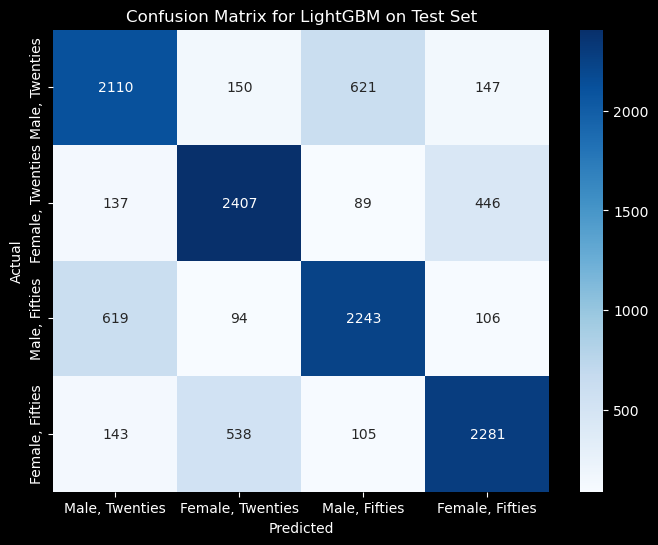

In [ ]:
from lightgbm import LGBMClassifier


# ------------------------------
# 1. OPTUNA LIGHTGBM HYPERPARAMETER TUNING
# ------------------------------
def objective_lgb(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
    }

    model = LGBMClassifier(**param)
    model.fit(X_train_scaled_all, y_train)
    y_val_pred = model.predict(X_val_scaled_all)
    return accuracy_score(y_val, y_val_pred)

study_lgb = optuna.create_study(direction='maximize')
study_lgb.optimize(objective_lgb, n_trials=30, n_jobs=2)

best_lgb_params = study_lgb.best_params
print(f"Best parameters found for LightGBM: {best_lgb_params}")

# ------------------------------
# 2. TRAIN BEST LIGHTGBM ON FULL TRAIN + VALIDATION DATA
# ------------------------------
X_combined_lgb = pd.concat([X_train_scaled_all, X_val_scaled_all])
y_combined_lgb = pd.concat([y_train, y_val])

best_lgb_model = LGBMClassifier(**best_lgb_params)
best_lgb_model.fit(X_combined_lgb, y_combined_lgb)

# ------------------------------
# 3. EVALUATE ON TEST SET
# ------------------------------
y_test_pred_lgb = best_lgb_model.predict(X_test_scaled_all)
test_acc_lgb = accuracy_score(y_test, y_test_pred_lgb)
print(f"\nTest Accuracy for LightGBM: {test_acc_lgb:.4f}")
print("Test Classification Report for LightGBM:\n", classification_report(y_test, y_test_pred_lgb))

cm_lgb = confusion_matrix(y_test, y_test_pred_lgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgb, annot=True, fmt="d", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for LightGBM on Test Set")
plt.show()

# # ------------------------------
# # 4. LEARNING CURVE FOR LIGHTGBM
# # ------------------------------
lgb_for_curve = LGBMClassifier(**best_lgb_params)
train_sizes, train_scores, val_scores = learning_curve(
    estimator=lgb_for_curve,
    X=X_train_scaled_all,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)

train_mean_lgb = np.mean(train_scores, axis=1)
train_std_lgb = np.std(train_scores, axis=1)
val_mean_lgb = np.mean(val_scores, axis=1)
val_std_lgb = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean_lgb, label="Training Accuracy", marker="o", color="green")
plt.fill_between(train_sizes, train_mean_lgb - train_std_lgb, train_mean_lgb + train_std_lgb, alpha=0.2, color="green")

plt.plot(train_sizes, val_mean_lgb, label="Validation Accuracy", marker="s", color="red")
plt.fill_between(train_sizes, val_mean_lgb - val_std_lgb, val_mean_lgb + val_std_lgb, alpha=0.2, color="red")

plt.title("Learning Curve for Best LightGBM Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


----------------

**_Decsion Tree_**

[I 2025-05-03 21:22:43,945] A new study created in memory with name: no-name-c7e4a383-59ab-4e5d-b722-c1ec37afae4e
[I 2025-05-03 21:22:44,705] Trial 1 finished with value: 0.48336738863914996 and parameters: {'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'log2', 'criterion': 'entropy'}. Best is trial 1 with value: 0.48336738863914996.
[I 2025-05-03 21:22:45,146] Trial 2 finished with value: 0.43906824683285656 and parameters: {'max_depth': 5, 'min_samples_split': 19, 'min_samples_leaf': 19, 'max_features': 'log2', 'criterion': 'entropy'}. Best is trial 1 with value: 0.48336738863914996.
[I 2025-05-03 21:22:46,784] Trial 0 finished with value: 0.4630976706170821 and parameters: {'max_depth': 5, 'min_samples_split': 11, 'min_samples_leaf': 2, 'max_features': None, 'criterion': 'entropy'}. Best is trial 1 with value: 0.48336738863914996.
[I 2025-05-03 21:22:47,319] Trial 4 finished with value: 0.46808336738863915 and parameters: {'max_depth': 7, 'min_sample

Best parameters found for Decision Tree: {'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 13, 'max_features': None, 'criterion': 'gini'}

Test Accuracy for Decision Tree: 0.5359
Test Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.49      0.52      0.50      3028
           1       0.55      0.59      0.57      3079
           2       0.56      0.54      0.55      3062
           3       0.54      0.50      0.52      3067

    accuracy                           0.54     12236
   macro avg       0.54      0.54      0.54     12236
weighted avg       0.54      0.54      0.54     12236



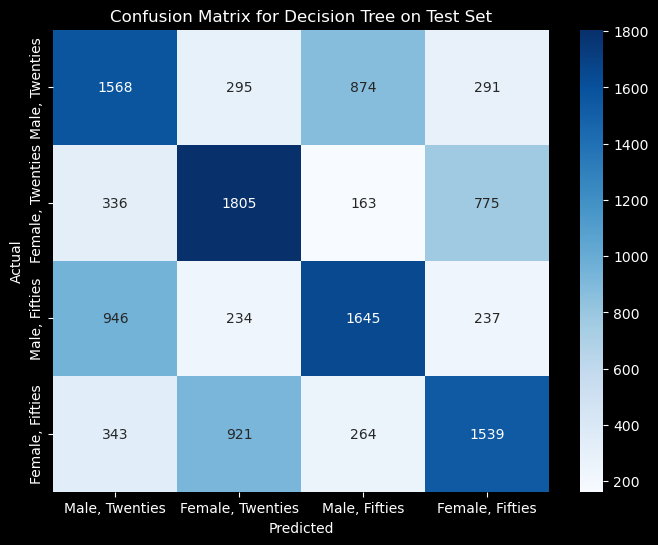

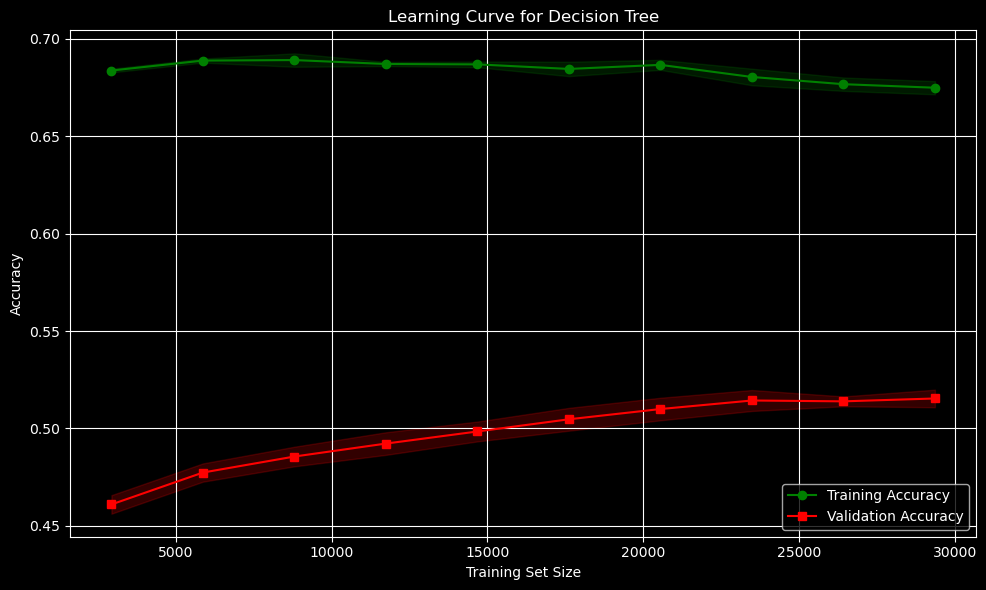

In [28]:
from sklearn.tree import DecisionTreeClassifier
import optuna
# ------------------------------
# 1. OPTUNA DECISION TREE HYPERPARAMETER TUNING
# ------------------------------
def objective_dt(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
    }

    model = DecisionTreeClassifier(**param)
    model.fit(X_train_scaled_all, y_train)
    y_val_pred = model.predict(X_val_scaled_all)
    return accuracy_score(y_val, y_val_pred)

study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective_dt, n_trials=200, n_jobs=2)

best_dt_params = study_dt.best_params
print(f"Best parameters found for Decision Tree: {best_dt_params}")

# ------------------------------
# 2. TRAIN BEST DECISION TREE ON FULL TRAIN + VALIDATION DATA
# ------------------------------
X_combined_dt = pd.concat([X_train_scaled_all, X_val_scaled_all])
y_combined_dt = pd.concat([y_train, y_val])

best_dt_model = DecisionTreeClassifier(**best_dt_params)
best_dt_model.fit(X_combined_dt, y_combined_dt)

# ------------------------------
# 3. EVALUATE ON TEST SET
# ------------------------------
y_test_pred_dt = best_dt_model.predict(X_test_scaled_all)
test_acc_dt = accuracy_score(y_test, y_test_pred_dt)
print(f"\nTest Accuracy for Decision Tree: {test_acc_dt:.4f}")
print("Test Classification Report for Decision Tree:\n", classification_report(y_test, y_test_pred_dt))

cm_dt = confusion_matrix(y_test, y_test_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Decision Tree on Test Set")
plt.show()

# ------------------------------
# 4. LEARNING CURVE FOR DECISION TREE
# ------------------------------
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_dt_model,
    X=X_train_scaled_all,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)

train_mean_dt = np.mean(train_scores, axis=1)
train_std_dt = np.std(train_scores, axis=1)
val_mean_dt = np.mean(val_scores, axis=1)
val_std_dt = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean_dt, label="Training Accuracy", marker="o", color="green")
plt.fill_between(train_sizes, train_mean_dt - train_std_dt, train_mean_dt + train_std_dt, alpha=0.2, color="green")

plt.plot(train_sizes, val_mean_dt, label="Validation Accuracy", marker="s", color="red")
plt.fill_between(train_sizes, val_mean_dt - val_std_dt, val_mean_dt + val_std_dt, alpha=0.2, color="red")

plt.title("Learning Curve for Decision Tree")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

----------------------------------

**_After Feature Selection_**

                  Feature  Spearman Correlation
0                     zcr              0.128650
3       spectral_centroid              0.116755
95                 mfcc_7              0.099931
5       band_energy_ratio              0.096509
32   spectral_contrast_24              0.091453
..                    ...                   ...
91                 mfcc_3             -0.138332
114             chroma_11             -0.155025
104              chroma_1             -0.160652
103              chroma_0             -0.172400
89                 mfcc_1             -0.186674

[126 rows x 2 columns]


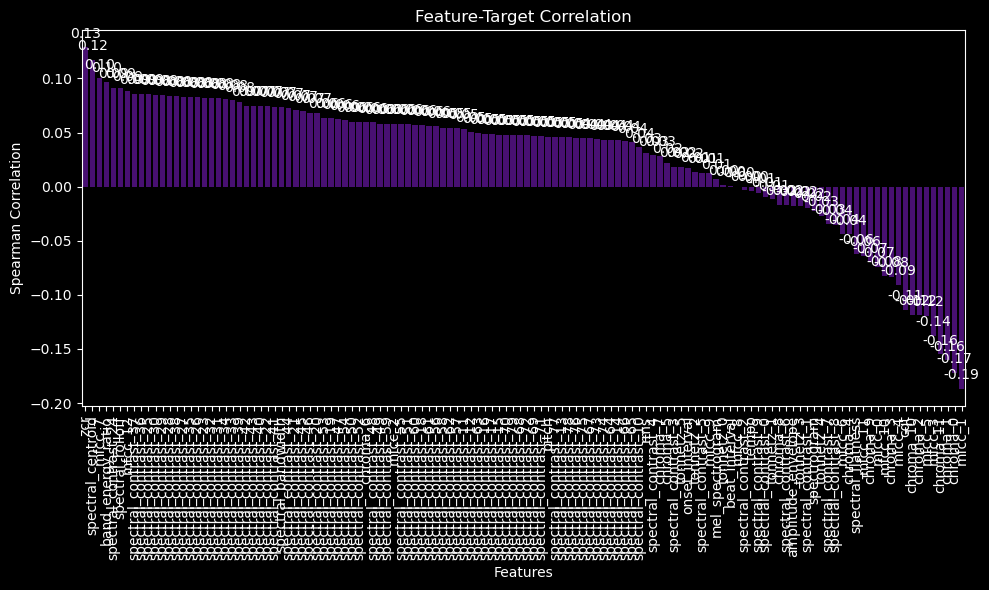

In [23]:
from scipy.stats import spearmanr

# Assuming X_train is your feature matrix and y_train is your target variable

# Combine X_train and y_train into one DataFrame for easier manipulation
data = pd.concat([X_train, y_train], axis=1)

# Calculate Spearman correlation between each feature and the target variable
spearman_corr = {}
for column in X_train.columns:
    corr, _ = spearmanr(data[column], y_train)
    spearman_corr[column] = corr

# Convert the dictionary to a pandas DataFrame for easy viewing
spearman_corr_df_X = pd.DataFrame(list(spearman_corr.items()), columns=['Feature', 'Spearman Correlation'])
spearman_corr_df_X = spearman_corr_df_X.sort_values(by='Spearman Correlation', ascending=False)

# Show the correlation results
print(spearman_corr_df_X)

def plot_feature_target_correlation(corr_df):
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=corr_df['Feature'], y=corr_df['Spearman Correlation'], color='#4b0082')
    plt.title('Feature-Target Correlation')
    plt.xlabel('Features')
    plt.ylabel('Spearman Correlation')
    plt.xticks(rotation=90)
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    plt.tight_layout()
    plt.show()

# Example usage with the spearman_corr_df_X DataFrame
plot_feature_target_correlation(spearman_corr_df_X)

In [27]:
threshold = 0.06
selected_features = spearman_corr_df_X[spearman_corr_df_X['Spearman Correlation'].abs() > threshold]

# Get the list of selected feature names
selected_feature_names = selected_features['Feature'].tolist()
print(selected_feature_names)

['zcr', 'spectral_centroid', 'mfcc_7', 'band_energy_ratio', 'spectral_contrast_24', 'spectral_rolloff', 'mfcc_12', 'spectral_contrast_37', 'spectral_contrast_36', 'spectral_contrast_25', 'spectral_contrast_30', 'spectral_contrast_29', 'spectral_contrast_28', 'spectral_contrast_38', 'spectral_contrast_27', 'spectral_contrast_35', 'spectral_contrast_26', 'spectral_contrast_23', 'spectral_contrast_32', 'spectral_contrast_31', 'spectral_contrast_34', 'spectral_contrast_33', 'spectral_contrast_39', 'spectral_contrast_42', 'spectral_contrast_43', 'spectral_contrast_40', 'spectral_contrast_22', 'spectral_contrast_41', 'spectral_bandwidth', 'spectral_contrast_44', 'spectral_contrast_21', 'spectral_contrast_45', 'spectral_contrast_46', 'spectral_contrast_20', 'spectral_contrast_53', 'spectral_contrast_19', 'spectral_contrast_47', 'spectral_contrast_54', 'spectral_contrast_50', 'spectral_contrast_52', 'spectral_flatness', 'mfcc_11', 'chroma_9', 'mfcc_0', 'mfcc_10', 'chroma_3', 'mfcc_4', 'cqt', '

In [26]:
X_train.shape

(36706, 126)

In [28]:
X_train_selected_spearman = X_train[selected_feature_names]
X_val_selected_spearman = X_val[selected_feature_names]
X_test_selected_spearman = X_test[selected_feature_names]
def scale_features(X_train, X_val, X_test):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()

    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    return X_train_scaled_df, X_val_scaled_df, X_test_scaled_df

# Step 4: Apply scaling
X_train_scaled_spearman, X_val_scaled_spearman, X_test_scaled_spearman = scale_features(X_train_selected_spearman, X_val_selected_spearman, X_test_selected_spearman)
X_train_scaled_spearman.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36706 entries, 0 to 36705
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   zcr                   36706 non-null  float64
 1   spectral_centroid     36706 non-null  float64
 2   mfcc_7                36706 non-null  float64
 3   band_energy_ratio     36706 non-null  float64
 4   spectral_contrast_24  36706 non-null  float64
 5   spectral_rolloff      36706 non-null  float64
 6   mfcc_12               36706 non-null  float64
 7   spectral_contrast_37  36706 non-null  float64
 8   spectral_contrast_36  36706 non-null  float64
 9   spectral_contrast_25  36706 non-null  float64
 10  spectral_contrast_30  36706 non-null  float64
 11  spectral_contrast_29  36706 non-null  float64
 12  spectral_contrast_28  36706 non-null  float64
 13  spectral_contrast_38  36706 non-null  float64
 14  spectral_contrast_27  36706 non-null  float64
 15  spectral_contrast_3

[I 2025-05-01 19:34:01,980] A new study created in memory with name: no-name-d5b9a04c-3a51-479c-b3eb-710ae15b1f1e


[I 2025-05-01 19:34:05,590] Trial 1 finished with value: 0.4753575807110748 and parameters: {'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 9, 'max_features': None, 'criterion': 'gini'}. Best is trial 1 with value: 0.4753575807110748.
[I 2025-05-01 19:34:06,130] Trial 2 finished with value: 0.4484675112382509 and parameters: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'criterion': 'gini'}. Best is trial 1 with value: 0.4753575807110748.
[I 2025-05-01 19:34:06,916] Trial 0 finished with value: 0.5073968124233755 and parameters: {'max_depth': 8, 'min_samples_split': 15, 'min_samples_leaf': 13, 'max_features': None, 'criterion': 'gini'}. Best is trial 0 with value: 0.5073968124233755.
[I 2025-05-01 19:34:07,031] Trial 3 finished with value: 0.46129955046996324 and parameters: {'max_depth': 8, 'min_samples_split': 16, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'criterion': 'entropy'}. Best is trial 0 with value: 0.5073968124233

Best parameters found for Decision Tree: {'max_depth': 11, 'min_samples_split': 16, 'min_samples_leaf': 14, 'max_features': None, 'criterion': 'gini'}

Test Accuracy for Decision Tree: 0.5183
Test Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.46      0.46      0.46      3028
           1       0.55      0.62      0.58      3079
           2       0.52      0.52      0.52      3062
           3       0.54      0.47      0.50      3067

    accuracy                           0.52     12236
   macro avg       0.52      0.52      0.52     12236
weighted avg       0.52      0.52      0.52     12236



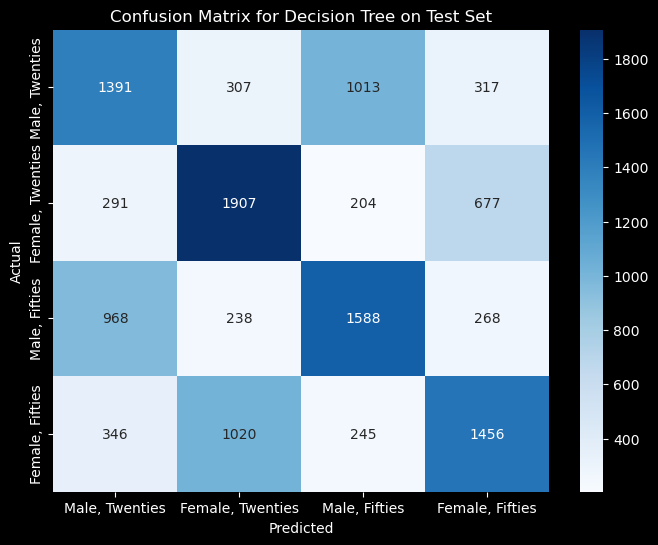

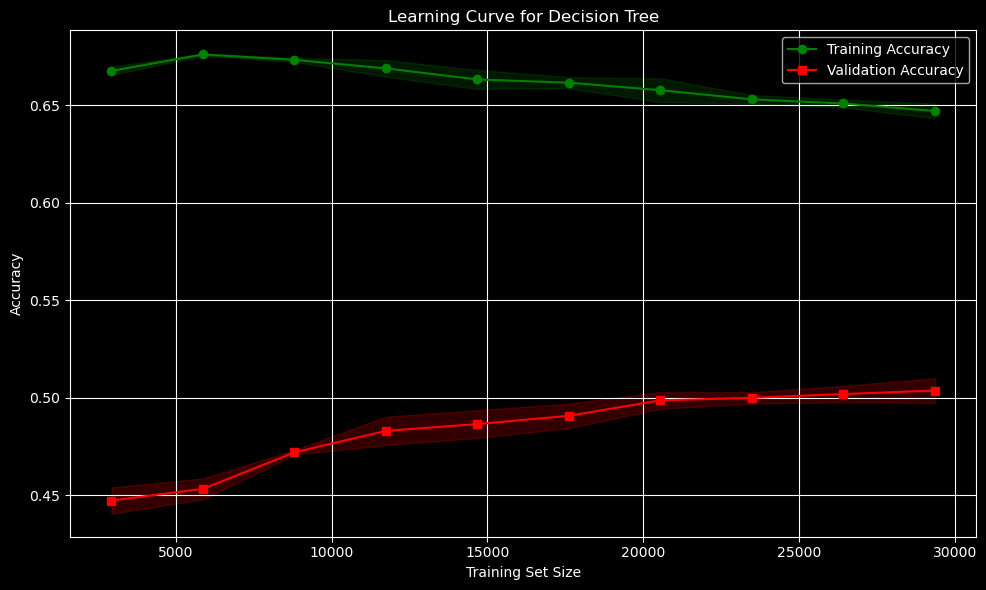

In [29]:
from sklearn.tree import DecisionTreeClassifier
# ------------------------------
# 1. OPTUNA DECISION TREE HYPERPARAMETER TUNING
# ------------------------------
def objective_dt(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
    }

    model = DecisionTreeClassifier(**param)
    model.fit(X_train_scaled_spearman, y_train)
    y_val_pred = model.predict(X_val_scaled_spearman)
    return accuracy_score(y_val, y_val_pred)

study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective_dt, n_trials=100, n_jobs=2)

best_dt_params = study_dt.best_params
print(f"Best parameters found for Decision Tree: {best_dt_params}")

# ------------------------------
# 2. TRAIN BEST DECISION TREE ON FULL TRAIN + VALIDATION DATA
# ------------------------------
X_combined_dt = pd.concat([X_train_scaled_spearman, X_val_scaled_spearman])
y_combined_dt = pd.concat([y_train, y_val])

best_dt_model = DecisionTreeClassifier(**best_dt_params)
best_dt_model.fit(X_combined_dt, y_combined_dt)

# ------------------------------
# 3. EVALUATE ON TEST SET
# ------------------------------
y_test_pred_dt = best_dt_model.predict(X_test_scaled_spearman)
test_acc_dt = accuracy_score(y_test, y_test_pred_dt)
print(f"\nTest Accuracy for Decision Tree: {test_acc_dt:.4f}")
print("Test Classification Report for Decision Tree:\n", classification_report(y_test, y_test_pred_dt))

cm_dt = confusion_matrix(y_test, y_test_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Decision Tree on Test Set")
plt.show()

# ------------------------------
# 4. LEARNING CURVE FOR DECISION TREE
# ------------------------------
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_dt_model,
    X=X_train_scaled_spearman,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)

train_mean_dt = np.mean(train_scores, axis=1)
train_std_dt = np.std(train_scores, axis=1)
val_mean_dt = np.mean(val_scores, axis=1)
val_std_dt = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean_dt, label="Training Accuracy", marker="o", color="green")
plt.fill_between(train_sizes, train_mean_dt - train_std_dt, train_mean_dt + train_std_dt, alpha=0.2, color="green")

plt.plot(train_sizes, val_mean_dt, label="Validation Accuracy", marker="s", color="red")
plt.fill_between(train_sizes, val_mean_dt - val_std_dt, val_mean_dt + val_std_dt, alpha=0.2, color="red")

plt.title("Learning Curve for Decision Tree")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

[I 2025-05-01 19:40:20,344] A new study created in memory with name: no-name-df1c581f-e10d-4b26-8f45-1e6eda045da7
[I 2025-05-01 19:40:27,093] Trial 0 finished with value: 0.5807928075194115 and parameters: {'n_neighbors': 30, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 0 with value: 0.5807928075194115.
[I 2025-05-01 19:40:31,152] Trial 2 finished with value: 0.5753984470780548 and parameters: {'n_neighbors': 50, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 0 with value: 0.5807928075194115.
[I 2025-05-01 19:40:36,467] Trial 3 finished with value: 0.5731099305271762 and parameters: {'n_neighbors': 25, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 0 with value: 0.5807928075194115.
[I 2025-05-01 19:40:42,431] Trial 4 finished with value: 0.5773600326930936 and parameters: {'n_neighbors': 34, 'weights': 'distance', 'metric': 'minkowski'}. Best is trial 0 with value: 0.5807928075194115.
[I 2025-05-01 19:40:46,194] Trial 5 finished with value: 0.

Best parameters found for KNN: {'n_neighbors': 30, 'weights': 'distance', 'metric': 'euclidean'}

Test Accuracy for KNN: 0.5875
Test Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.60      0.39      0.47      3028
           1       0.61      0.70      0.65      3079
           2       0.54      0.69      0.61      3062
           3       0.62      0.57      0.59      3067

    accuracy                           0.59     12236
   macro avg       0.59      0.59      0.58     12236
weighted avg       0.59      0.59      0.58     12236



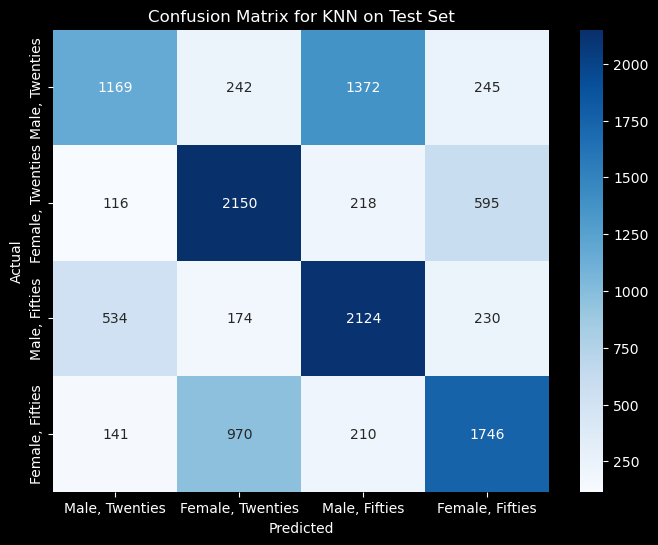

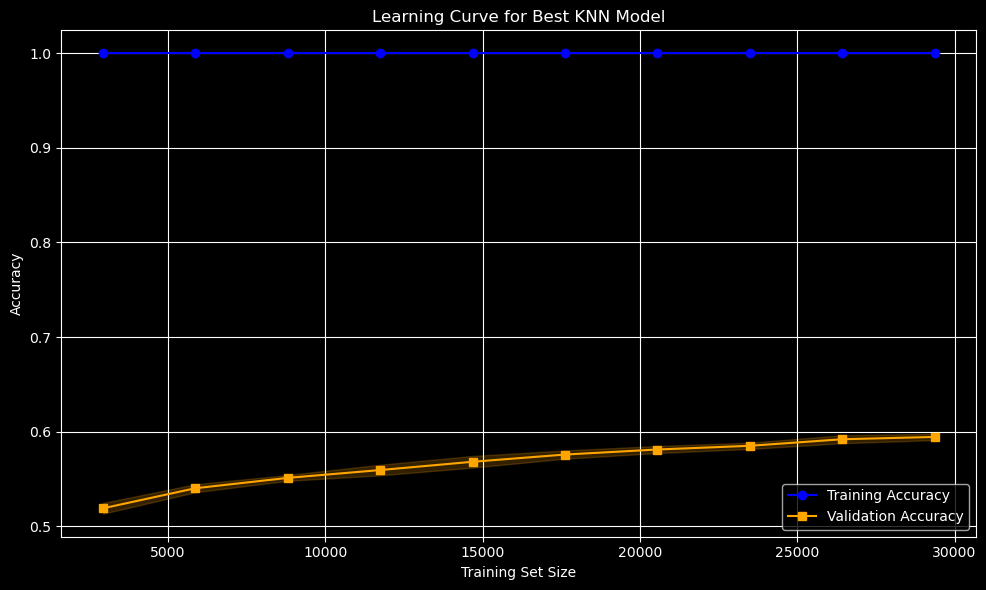

In [30]:
# ------------------------------
# 1. OPTUNA KNN HYPERPARAMETER TUNING
# ------------------------------
def objective_knn(trial):
    # Define the hyperparameter space for KNN
    param = {
        'n_neighbors': trial.suggest_int('n_neighbors', 1, 50),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'metric': trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski']),
    }

    # Initialize the KNN model
    knn_model = KNeighborsClassifier(**param)

    # Train on the training set and validate on the validation set
    knn_model.fit(X_train_scaled_spearman, y_train)
    y_val_pred = knn_model.predict(X_val_scaled_spearman)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    return val_accuracy

# Create a study object and optimize the objective function
study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=200, n_jobs=2)

# Get the best parameters from the study
best_knn_params = study_knn.best_params
print(f"Best parameters found for KNN: {best_knn_params}")

# ------------------------------
# 2. TRAIN BEST KNN ON FULL TRAIN + VALIDATION DATA
# ------------------------------
# Combine training and validation sets for final training
X_combined_knn = pd.concat([X_train_scaled_spearman, X_val_scaled_spearman])
y_combined_knn = pd.concat([y_train, y_val])

# Train best KNN model on full combined set
best_knn_model = KNeighborsClassifier(**best_knn_params)
best_knn_model.fit(X_combined_knn, y_combined_knn)

# ------------------------------
# 3. EVALUATE ON TEST SET
# ------------------------------
y_test_pred_knn = best_knn_model.predict(X_test_scaled_spearman)
test_acc_knn = accuracy_score(y_test, y_test_pred_knn)
print(f"\nTest Accuracy for KNN: {test_acc_knn:.4f}")
print("Test Classification Report for KNN:\n", classification_report(y_test, y_test_pred_knn))

# Confusion matrix
cm_knn = confusion_matrix(y_test, y_test_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for KNN on Test Set")
plt.show()

# ------------------------------
# 4. LEARNING CURVE PLOT USING ORIGINAL TRAINING DATA ONLY
# ------------------------------
train_sizes = np.linspace(0.1, 1.0, 10)

knn_for_curve = KNeighborsClassifier(**best_knn_params)
train_sizes, train_scores, val_scores = learning_curve(
    estimator=knn_for_curve,
    X=X_train_scaled,
    y=y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)

# Mean & Std
train_mean_knn = np.mean(train_scores, axis=1)
train_std_knn = np.std(train_scores, axis=1)
val_mean_knn = np.mean(val_scores, axis=1)
val_std_knn = np.std(val_scores, axis=1)

# Plot learning curve for KNN
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean_knn, label="Training Accuracy", marker="o", color="blue")
plt.fill_between(train_sizes, train_mean_knn - train_std_knn, train_mean_knn + train_std_knn, alpha=0.2, color="blue")

plt.plot(train_sizes, val_mean_knn, label="Validation Accuracy", marker="s", color="orange")
plt.fill_between(train_sizes, val_mean_knn - val_std_knn, val_mean_knn + val_std_knn, alpha=0.2, color="orange")

plt.title("Learning Curve for Best KNN Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


[I 2025-05-01 19:56:50,450] A new study created in memory with name: no-name-5f2d0019-95ea-410d-9a11-a44fe7840aad
[I 2025-05-01 19:57:12,129] Trial 0 finished with value: 0.6530445443400081 and parameters: {'n_estimators': 134, 'max_depth': 11, 'learning_rate': 0.18157102435805558, 'num_leaves': 57, 'subsample': 0.7584577358528555, 'colsample_bytree': 0.7213771501353088, 'reg_alpha': 0.6992224883288773, 'reg_lambda': 0.19580473447985125}. Best is trial 0 with value: 0.6530445443400081.
[I 2025-05-01 19:57:44,747] Trial 2 finished with value: 0.6513281569268492 and parameters: {'n_estimators': 357, 'max_depth': 14, 'learning_rate': 0.2938536301165349, 'num_leaves': 22, 'subsample': 0.6749441695882121, 'colsample_bytree': 0.8259463634299198, 'reg_alpha': 0.9961368595568388, 'reg_lambda': 0.8502141841111949}. Best is trial 0 with value: 0.6530445443400081.
[I 2025-05-01 19:57:58,598] Trial 1 finished with value: 0.6570494483040458 and parameters: {'n_estimators': 426, 'max_depth': 13, 'le

Best parameters found for LightGBM: {'n_estimators': 476, 'max_depth': 11, 'learning_rate': 0.14563115971083224, 'num_leaves': 116, 'subsample': 0.6908687245171959, 'colsample_bytree': 0.9997932650940871, 'reg_alpha': 0.3698208442940185, 'reg_lambda': 0.31268951904806314}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14280
[LightGBM] [Info] Number of data points in the train set: 48941, number of used features: 56
[LightGBM] [Info] Start training from score -1.396419
[LightGBM] [Info] Start training from score -1.379716
[LightGBM] [Info] Start training from score -1.385498
[LightGBM] [Info] Start training from score -1.383621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Test Accuracy for LightGBM: 0.6836
Test Classification Report for Ligh

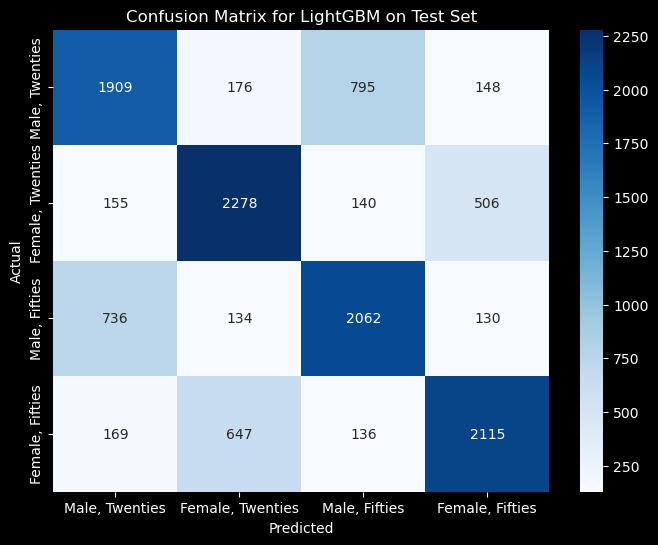

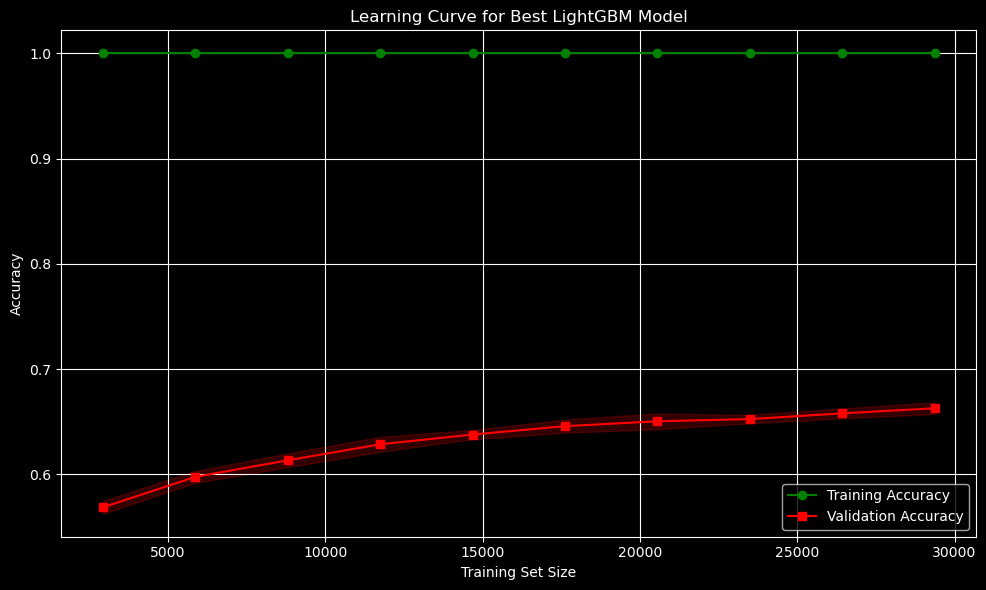

In [31]:
from lightgbm import LGBMClassifier


# ------------------------------
# 1. OPTUNA LIGHTGBM HYPERPARAMETER TUNING
# ------------------------------
def objective_lgb(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
    }

    model = LGBMClassifier(**param)
    model.fit(X_train_scaled_spearman, y_train)
    y_val_pred = model.predict(X_val_scaled_spearman)
    return accuracy_score(y_val, y_val_pred)

study_lgb = optuna.create_study(direction='maximize')
study_lgb.optimize(objective_lgb, n_trials=50, n_jobs=2)

best_lgb_params = study_lgb.best_params
print(f"Best parameters found for LightGBM: {best_lgb_params}")

# ------------------------------
# 2. TRAIN BEST LIGHTGBM ON FULL TRAIN + VALIDATION DATA
# ------------------------------
X_combined_lgb = pd.concat([X_train_scaled_spearman, X_val_scaled_spearman])
y_combined_lgb = pd.concat([y_train, y_val])

best_lgb_model = LGBMClassifier(**best_lgb_params)
best_lgb_model.fit(X_combined_lgb, y_combined_lgb)

# ------------------------------
# 3. EVALUATE ON TEST SET
# ------------------------------
y_test_pred_lgb = best_lgb_model.predict(X_test_scaled_spearman)
test_acc_lgb = accuracy_score(y_test, y_test_pred_lgb)
print(f"\nTest Accuracy for LightGBM: {test_acc_lgb:.4f}")
print("Test Classification Report for LightGBM:\n", classification_report(y_test, y_test_pred_lgb))

cm_lgb = confusion_matrix(y_test, y_test_pred_lgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgb, annot=True, fmt="d", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for LightGBM on Test Set")
plt.show()

# # ------------------------------
# # 4. LEARNING CURVE FOR LIGHTGBM
# # ------------------------------
lgb_for_curve = LGBMClassifier(**best_lgb_params)
train_sizes, train_scores, val_scores = learning_curve(
    estimator=lgb_for_curve,
    X=X_train_scaled_spearman,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)

train_mean_lgb = np.mean(train_scores, axis=1)
train_std_lgb = np.std(train_scores, axis=1)
val_mean_lgb = np.mean(val_scores, axis=1)
val_std_lgb = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean_lgb, label="Training Accuracy", marker="o", color="green")
plt.fill_between(train_sizes, train_mean_lgb - train_std_lgb, train_mean_lgb + train_std_lgb, alpha=0.2, color="green")

plt.plot(train_sizes, val_mean_lgb, label="Validation Accuracy", marker="s", color="red")
plt.fill_between(train_sizes, val_mean_lgb - val_std_lgb, val_mean_lgb + val_std_lgb, alpha=0.2, color="red")

plt.title("Learning Curve for Best LightGBM Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
print(f"Number of features: {len(train_df.columns)}")
print("Feature names:")
for i, col in enumerate(train_df.columns):
    print(f"{i+1}. {col}")

Number of features: 129
Feature names:
1. zcr
2. rms
3. amplitude_envelope
4. spectral_centroid
5. spectral_bandwidth
6. band_energy_ratio
7. spectral_rolloff
8. spectral_flatness
9. spectral_contrast_0
10. spectral_contrast_1
11. spectral_contrast_2
12. spectral_contrast_3
13. spectral_contrast_4
14. spectral_contrast_5
15. spectral_contrast_6
16. spectral_contrast_7
17. spectral_contrast_8
18. spectral_contrast_9
19. spectral_contrast_10
20. spectral_contrast_11
21. spectral_contrast_12
22. spectral_contrast_13
23. spectral_contrast_14
24. spectral_contrast_15
25. spectral_contrast_16
26. spectral_contrast_17
27. spectral_contrast_18
28. spectral_contrast_19
29. spectral_contrast_20
30. spectral_contrast_21
31. spectral_contrast_22
32. spectral_contrast_23
33. spectral_contrast_24
34. spectral_contrast_25
35. spectral_contrast_26
36. spectral_contrast_27
37. spectral_contrast_28
38. spectral_contrast_29
39. spectral_contrast_30
40. spectral_contrast_31
41. spectral_contrast_32
42. sp

[I 2025-05-01 21:09:28,663] A new study created in memory with name: no-name-d8315dcd-e0be-4e28-a696-fcf872c2799a
[I 2025-05-01 21:11:13,079] Trial 1 finished with value: 0.7212913771965672 and parameters: {'n_estimators': 366, 'max_depth': 11, 'learning_rate': 0.12203429119391981, 'num_leaves': 54, 'subsample': 0.7727316388110343, 'colsample_bytree': 0.5221654177243837, 'reg_alpha': 0.09123531811800178, 'reg_lambda': 0.9804566175138876}. Best is trial 1 with value: 0.7212913771965672.
[I 2025-05-01 21:12:23,472] Trial 0 finished with value: 0.7355128729055987 and parameters: {'n_estimators': 473, 'max_depth': 11, 'learning_rate': 0.1071390198602441, 'num_leaves': 118, 'subsample': 0.9797552231694526, 'colsample_bytree': 0.5855534857627689, 'reg_alpha': 0.4735360618827327, 'reg_lambda': 0.39008065807830805}. Best is trial 0 with value: 0.7355128729055987.


Best parameters found for LightGBM: {'n_estimators': 473, 'max_depth': 11, 'learning_rate': 0.1071390198602441, 'num_leaves': 118, 'subsample': 0.9797552231694526, 'colsample_bytree': 0.5855534857627689, 'reg_alpha': 0.4735360618827327, 'reg_lambda': 0.39008065807830805}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043471 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31900
[LightGBM] [Info] Number of data points in the train set: 48941, number of used features: 126
[LightGBM] [Info] Start training from score -1.396419
[LightGBM] [Info] Start training from score -1.379716
[LightGBM] [Info] Start training from score -1.385498
[LightGBM] [Info] Start training from score -1.383621

Test Accuracy for LightGBM: 0.7484
Test Classification Report for LightGBM:
               precision    recall  f1-score   support

           0       0.70      0.69      0.70      3028
           1       0.76      0.81 

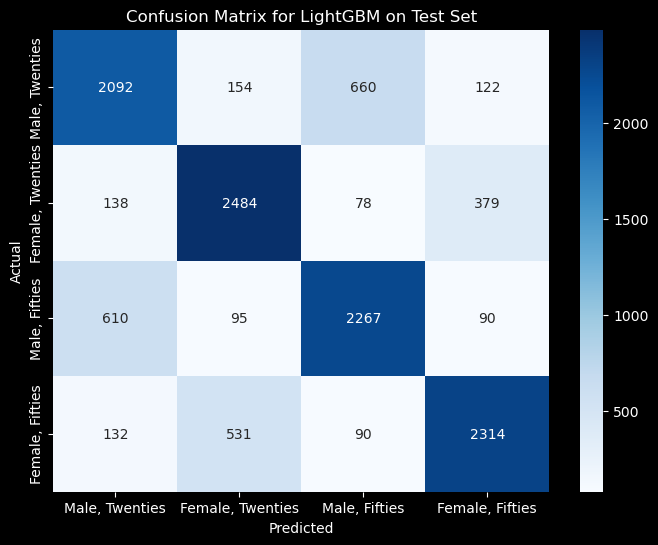

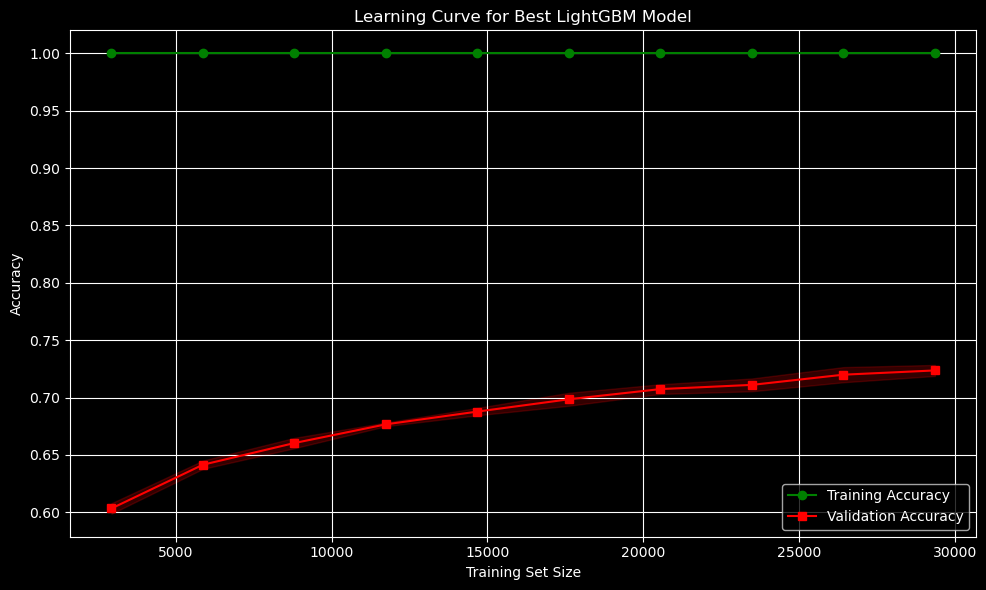

In [32]:



# ------------------------------
# 1. OPTUNA LIGHTGBM HYPERPARAMETER TUNING
# ------------------------------
def objective_lgb(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
    }

    model = LGBMClassifier(**param)
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    return accuracy_score(y_val, y_val_pred)

study_lgb = optuna.create_study(direction='maximize')
study_lgb.optimize(objective_lgb, n_trials=2, n_jobs=2)

best_lgb_params = study_lgb.best_params
print(f"Best parameters found for LightGBM: {best_lgb_params}")

# ------------------------------
# 2. TRAIN BEST LIGHTGBM ON FULL TRAIN + VALIDATION DATA
# ------------------------------
X_combined_lgb = pd.concat([X_train, X_val])
y_combined_lgb = pd.concat([y_train, y_val])

best_lgb_model = LGBMClassifier(**best_lgb_params)
best_lgb_model.fit(X_combined_lgb, y_combined_lgb)

# ------------------------------
# 3. EVALUATE ON TEST SET
# ------------------------------
y_test_pred_lgb = best_lgb_model.predict(X_test)
test_acc_lgb = accuracy_score(y_test, y_test_pred_lgb)
print(f"\nTest Accuracy for LightGBM: {test_acc_lgb:.4f}")
print("Test Classification Report for LightGBM:\n", classification_report(y_test, y_test_pred_lgb))

cm_lgb = confusion_matrix(y_test, y_test_pred_lgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgb, annot=True, fmt="d", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for LightGBM on Test Set")
plt.show()

# # ------------------------------
# # 4. LEARNING CURVE FOR LIGHTGBM
# # ------------------------------
lgb_for_curve = LGBMClassifier(**best_lgb_params)
train_sizes, train_scores, val_scores = learning_curve(
    estimator=lgb_for_curve,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)

train_mean_lgb = np.mean(train_scores, axis=1)
train_std_lgb = np.std(train_scores, axis=1)
val_mean_lgb = np.mean(val_scores, axis=1)
val_std_lgb = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean_lgb, label="Training Accuracy", marker="o", color="green")
plt.fill_between(train_sizes, train_mean_lgb - train_std_lgb, train_mean_lgb + train_std_lgb, alpha=0.2, color="green")

plt.plot(train_sizes, val_mean_lgb, label="Validation Accuracy", marker="s", color="red")
plt.fill_between(train_sizes, val_mean_lgb - val_std_lgb, val_mean_lgb + val_std_lgb, alpha=0.2, color="red")

plt.title("Learning Curve for Best LightGBM Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
from sklearn.feature_selection import RFE
model = LGBMClassifier(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=120)
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Transform validation and test sets using the fitted RFE
X_val_rfe = rfe.transform(X_val)
X_test_rfe = rfe.transform(X_test)

# Step 3: Train the model on selected features
model.fit(X_train_rfe, y_train)

# Step 4: Evaluate the model
y_val_pred = model.predict(X_val_rfe)
y_test_pred = model.predict(X_test_rfe)

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.272313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31899
[LightGBM] [Info] Number of data points in the train set: 36706, number of used features: 126
[LightGBM] [Info] Start training from score -1.396426
[LightGBM] [Info] Start training from score -1.379723
[LightGBM] [Info] Start training from score -1.385477
[LightGBM] [Info] Start training from score -1.383628
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.055856 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31644
[LightGBM] [Info] Number of data points in the train set: 36706, number of used features: 125
[LightGBM] [Info] Start training from score -1.396426
[LightGBM] [Info] Start training from score -1.379723
[LightGBM] [Info] Start training from score -1.385477
[LightGBM] [Info] Start training from sc

coor


In [43]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Step 1: Remove low-variance features
selector = VarianceThreshold(threshold=0.01)
x_train_var = selector.fit_transform(X_train)
x_val_var = selector.transform(X_val)
x_test_var = selector.transform(X_test)

# Get the column names that survived
retained_columns = X_train.columns[selector.get_support()]

# Convert back to DataFrame
x_train_var = pd.DataFrame(x_train_var, columns=retained_columns)
x_val_var = pd.DataFrame(x_val_var, columns=retained_columns)
x_test_var = pd.DataFrame(x_test_var, columns=retained_columns)

# # Step 2: Select top K important features using Random Forest
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(x_train_var, y_train)

# importances = pd.Series(rf.feature_importances_, index=retained_columns)
# top_features = importances.sort_values(ascending=False).head(30).index  # keep top 30

# # Filter datasets by top features
# x_train_selected_CORR = x_train_var[top_features]
# x_val_selected_CORR = x_val_var[top_features]
# x_test_selected_CORR  = x_test_var[top_features]

# OPTIONAL Step 3: PCA (if still high-dimensional)
# pca = PCA(n_components=20)
# x_train_pca = pca.fit_transform(x_train_selected)
# x_val_pca = pca.transform(x_val_selected)
# x_test_pca = pca.transform(x_test_selected)


[I 2025-05-02 00:22:30,713] A new study created in memory with name: no-name-d8f3e5ca-284e-425a-9ac5-4d67059bd5ed
[I 2025-05-02 00:23:37,212] Trial 0 finished with value: 0.6589293011851246 and parameters: {'n_estimators': 300, 'max_depth': 12, 'learning_rate': 0.2513575083960563, 'num_leaves': 46, 'subsample': 0.8888486670849564, 'colsample_bytree': 0.5136021933705753, 'reg_alpha': 0.4382906261944395, 'reg_lambda': 0.79337357377519}. Best is trial 0 with value: 0.6589293011851246.
[I 2025-05-02 00:24:29,181] Trial 1 finished with value: 0.670044953003678 and parameters: {'n_estimators': 148, 'max_depth': 12, 'learning_rate': 0.29886296844984733, 'num_leaves': 135, 'subsample': 0.5254901567721446, 'colsample_bytree': 0.9070436421347123, 'reg_alpha': 0.33774571363920625, 'reg_lambda': 0.45793954290212535}. Best is trial 1 with value: 0.670044953003678.
[I 2025-05-02 00:27:02,001] Trial 3 finished with value: 0.6551695954229669 and parameters: {'n_estimators': 483, 'max_depth': 6, 'learn

Best parameters found for LightGBM: {'n_estimators': 416, 'max_depth': 11, 'learning_rate': 0.03657898522257505, 'num_leaves': 92, 'subsample': 0.6824336245198285, 'colsample_bytree': 0.868944798531362, 'reg_alpha': 0.5647506291137269, 'reg_lambda': 0.38602889818375363}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.052984 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25780
[LightGBM] [Info] Number of data points in the train set: 48941, number of used features: 102
[LightGBM] [Info] Start training from score -1.396419
[LightGBM] [Info] Start training from score -1.379716
[LightGBM] [Info] Start training from score -1.385498
[LightGBM] [Info] Start training from score -1.383621

Test Accuracy for LightGBM: 0.6887
Test Classification Report for LightGBM:
               precision    recall  f1-score   support

           0       0.64      0.62      0.63      3028
           1       0.69      0.74  

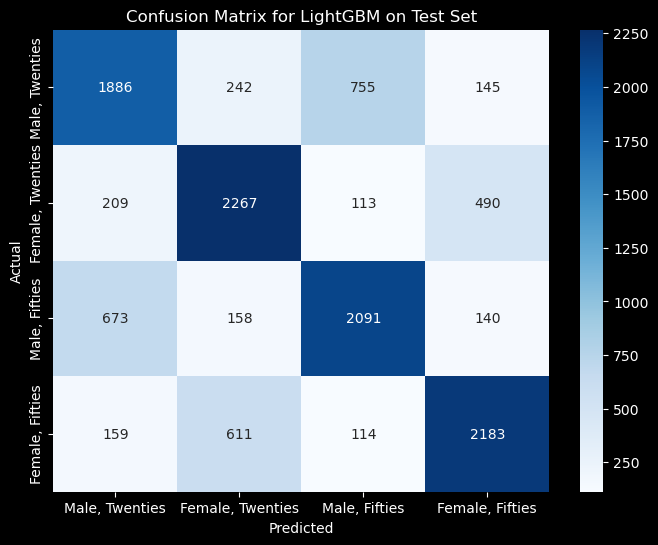

In [44]:



# ------------------------------
# 1. OPTUNA LIGHTGBM HYPERPARAMETER TUNING
# ------------------------------
def objective_lgb(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
    }

    model = LGBMClassifier(**param)
    model.fit(x_train_var, y_train)
    y_val_pred = model.predict(x_val_var)
    return accuracy_score(y_val, y_val_pred)

study_lgb = optuna.create_study(direction='maximize')
study_lgb.optimize(objective_lgb, n_trials=20, n_jobs=2)

best_lgb_params = study_lgb.best_params
print(f"Best parameters found for LightGBM: {best_lgb_params}")

# ------------------------------
# 2. TRAIN BEST LIGHTGBM ON FULL TRAIN + VALIDATION DATA
# ------------------------------
X_combined_lgb = pd.concat([x_train_var, x_val_var])
y_combined_lgb = pd.concat([y_train, y_val])

best_lgb_model = LGBMClassifier(**best_lgb_params)
best_lgb_model.fit(X_combined_lgb, y_combined_lgb)

# ------------------------------
# 3. EVALUATE ON TEST SET
# ------------------------------
y_test_pred_lgb = best_lgb_model.predict(x_test_var)
test_acc_lgb = accuracy_score(y_test, y_test_pred_lgb)
print(f"\nTest Accuracy for LightGBM: {test_acc_lgb:.4f}")
print("Test Classification Report for LightGBM:\n", classification_report(y_test, y_test_pred_lgb))

cm_lgb = confusion_matrix(y_test, y_test_pred_lgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgb, annot=True, fmt="d", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for LightGBM on Test Set")
plt.show()

# # ------------------------------
# # 4. LEARNING CURVE FOR LIGHTGBM
# # ------------------------------
# lgb_for_curve = LGBMClassifier(**best_lgb_params)
# train_sizes, train_scores, val_scores = learning_curve(
#     estimator=lgb_for_curve,
#     X=X_train,
#     y=y_train,
#     train_sizes=np.linspace(0.1, 1.0, 10),
#     cv=5,
#     scoring="accuracy",
#     n_jobs=-1,
# )

# train_mean_lgb = np.mean(train_scores, axis=1)
# train_std_lgb = np.std(train_scores, axis=1)
# val_mean_lgb = np.mean(val_scores, axis=1)
# val_std_lgb = np.std(val_scores, axis=1)

# plt.figure(figsize=(10, 6))
# plt.plot(train_sizes, train_mean_lgb, label="Training Accuracy", marker="o", color="green")
# plt.fill_between(train_sizes, train_mean_lgb - train_std_lgb, train_mean_lgb + train_std_lgb, alpha=0.2, color="green")

# plt.plot(train_sizes, val_mean_lgb, label="Validation Accuracy", marker="s", color="red")
# plt.fill_between(train_sizes, val_mean_lgb - val_std_lgb, val_mean_lgb + val_std_lgb, alpha=0.2, color="red")

# plt.title("Learning Curve for Best LightGBM Model")
# plt.xlabel("Training Set Size")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()
